# 1.Free parameter inference

## Google drive mount 

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
cd /content/gdrive/My Drive

/content/gdrive/My Drive


In [5]:
ls

 고전역학/
'데이터사이언스 스쿨 개인공부'/
'04.07 피봇테이블과 그룹분석.ipynb'
'0. Corona Virus Dataset'/
'100. 데이터경진대회 분석 시작.ipynb'
'1. Backup Files'/
'1 머신러닝(Machine Learning) 개념.ipynb'
'2020빅콘테스트 문제데이터(혁신아이디어분야)'/
'2. Classroom : 빅데이터 인공지능'/
'4. (연구) Peak Detection & Curve-Fitting'/
'5peak 3 para when it worksss.ipynb'
'Colab Notebooks'/
'Copy of Hyoungsun Park - _네이버 블로그 스크래핑.ipynb'
'연구 최종코드 진행중.ipynb'
'코로나 바이러스 데이터 분석.ipynb'
'Project : 빅데이터 인공지능 '/
 XPS/


In [6]:
cd XPS

/content/gdrive/My Drive/XPS


In [7]:
ls

ITO_O1s_bg.txt        ITO_O1s_p1.txt  P3HT_S2p_bg.txt        P3HT_S2p_p1.txt
ITO_O1s_exp.txt       ITO_O1s_p2.txt  P3HT_S2p_exp.txt       P3HT_S2p_p2.txt
ITO_O1s_fitting.txt   ITO_O1s_p3.txt  P3HT_S2p_fitting.txt
ITO_O1s_numerics.txt  model.png       P3HT_S2p_numerics.txt


## P3HT_S2p Data Visualization

### Data load and plotting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(["seaborn-whitegrid"])

# only two peak
bg = np.loadtxt("P3HT_S2p_bg.txt")
exp = np.loadtxt("P3HT_S2p_exp.txt")
fitting = np.loadtxt("P3HT_S2p_fitting.txt")
peak1 = np.loadtxt("P3HT_S2p_p1.txt")
peak2 = np.loadtxt("P3HT_S2p_p2.txt")

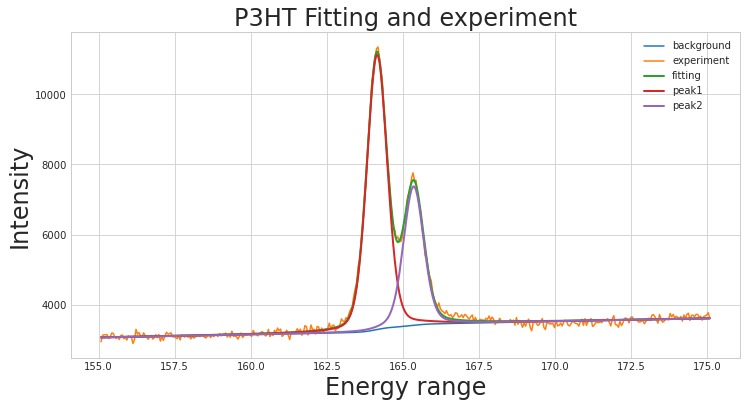

In [2]:
plt.figure(figsize = (12, 6))

plt.plot(bg[:, 0], bg[:, 1], label = "background")
plt.plot(exp[:, 0], exp[:, 1], label = "experiment")
plt.plot(fitting[:, 0], fitting[:, 1], label = "fitting", linewidth = 2)
plt.plot(peak1[:, 0], peak1[:, 1], label = "peak1", linewidth = 2)
plt.plot(peak2[:, 0], peak2[:, 1], label = "peak2", linewidth = 2)
plt.grid(True)
plt.title("P3HT Fitting and experiment", size = 24)
plt.xlabel("Energy range", size = 24)
plt.ylabel("Intensity", size = 24)
plt.legend()
plt.show()

In [3]:
# 실험 데이터의 grid number 파악하기
print(bg[:, 0].shape)
print(exp[:, 0].shape)
print(fitting[:, 0].shape)
print(peak1[:, 0].shape)
print(peak2[:, 0].shape)

# Background 제거
reduced_exp = exp[:, 1] - bg[:, 1]
reduced_peak1 = peak1[:, 1] - bg[:, 1]
reduced_peak2 = peak2[:, 1] - bg[:, 1]

# 실험 데이터의 범위 파악
print("XPS exp 최소값: {},  최대값: {}".format(reduced_exp.min(), reduced_exp.max()))
print("XPS peak1 최소값: {},  최대값: {}".format(reduced_peak1.min(), reduced_peak1.max()))
print("XPS peak2 최소값: {},  최대값: {}".format(reduced_peak2.min(), reduced_peak2.max()))


(401,)
(401,)
(600,)
(401,)
(401,)
XPS exp 최소값: -257.34102742614186,  최대값: 8062.741706161443
XPS peak1 최소값: 2.3131095757403273,  최대값: 7841.498304700606
XPS peak2 최소값: 1.3009478766489337,  최대값: 3965.7549875173377


### P3HT-Peak1

In [4]:
def Gaussian(x, x0, beta, w, amp):
    return amp * (np.exp(-np.log(2) * (x - x0)**2 / (beta*w)**2))

def Lorentzian(x, x1, gamma, w, amp):
    return amp* (1 / (1 + (x - x1)**2 / (gamma*w)**2))
    
def voigt(x, beta, gamma, amp):
    x0 = 164.15
    x1 = 164.13
    w = 0.789
    result = amp * (0.7 * Gaussian(x, x0, beta, w, amp=1) + 0.3 * Lorentzian(x, x1, gamma, w, amp=1))
    return result

[ 5.08563648e-01 -4.44264315e-01  7.92940661e+03]


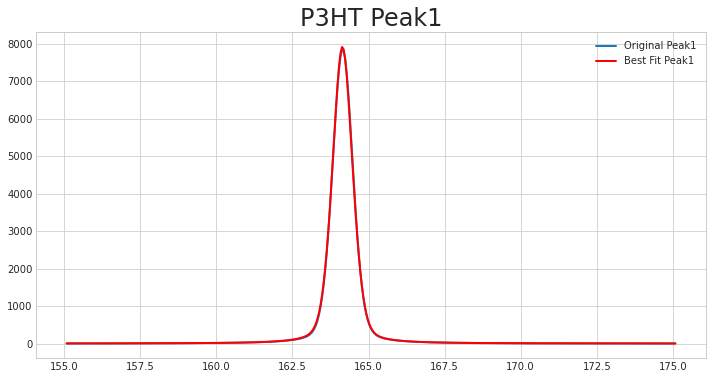

In [5]:
from scipy.optimize import curve_fit

initial_guess = [1.1, 0.587, 8000 ] 
popt, pcov = curve_fit(voigt, peak1[:,0], peak1[:,1] - bg[:, 1], p0=initial_guess) # background removed
print(popt)

plt.figure(figsize = (12, 6))
plt.plot(peak1[:, 0], peak1[:, 1] - bg[:, 1], label = "Original Peak1", linewidth=2) # background removed
plt.plot(peak1[:,0], voigt(peak1[:,0], *popt), label = "Best Fit Peak1", color='red', linewidth=2)
plt.title("P3HT Peak1", size = 24)
plt.legend()
plt.grid(True)
plt.show();

### P3HT-Peak2

In [6]:
def Gaussian(x, x0, beta, w, amp):
    return amp * (np.exp(-np.log(2) * (x - x0)**2 / (beta*w)**2))

def Lorentzian(x, x1, gamma, w, amp):
    return amp* (1 / (1 + (x - x1)**2 / (gamma*w)**2))
    
def voigt(x, beta, gamma, amp):
    x0 = 165.35
    x1 = 165.36
    w = 0.786
    result = amp * (0.7 * Gaussian(x, x0, beta, w, amp=1) + 0.3 * Lorentzian(x, x1, gamma, w, amp=1))
    return result

[5.09599989e-01 4.41623090e-01 4.01031417e+03]


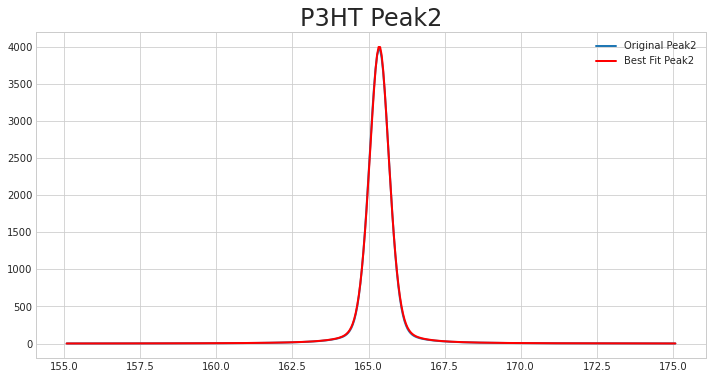

In [7]:
initial_guess = [4.1, 0.787, 3500 ] 
popt, pcov = curve_fit(voigt, peak2[:,0], peak2[:,1] - bg[:, 1], p0=initial_guess) # background removed
print(popt)

plt.figure(figsize = (12, 6))
plt.plot(peak2[:, 0], peak2[:, 1] - bg[:, 1], label = "Original Peak2", linewidth=2) # background removed
plt.plot(peak2[:, 0], voigt(peak2[:, 0], *popt), label = "Best Fit Peak2", color='red', linewidth=2)
plt.title("P3HT Peak2", size = 24)
plt.legend()
plt.grid(True)
plt.show();

## ITO_01s Data Visualizaton

### Data load and plotting

In [8]:
# only three peaks
bg = np.loadtxt("ITO_O1s_bg.txt")
exp = np.loadtxt("ITO_O1s_exp.txt")
fitting = np.loadtxt("ITO_O1s_fitting.txt")
peak1 = np.loadtxt("ITO_O1s_p1.txt")
peak2 = np.loadtxt("ITO_O1s_p2.txt")
peak3 = np.loadtxt("ITO_O1s_p3.txt")

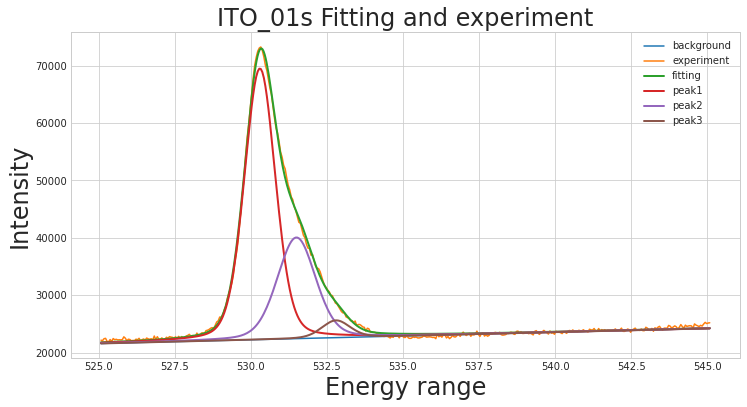

In [9]:
# Plotting data
plt.figure(figsize = (12, 6))
plt.plot(bg[:, 0], bg[:, 1], label = "background")
plt.plot(exp[:, 0], exp[:, 1], label = "experiment")
plt.plot(fitting[:, 0], fitting[:, 1], label = "fitting", linewidth = 2)
plt.plot(peak1[:, 0], peak1[:, 1], label = "peak1", linewidth = 2)
plt.plot(peak2[:, 0], peak2[:, 1], label = "peak2", linewidth = 2)
plt.plot(peak3[:, 0], peak3[:, 1], label = "peak3", linewidth = 2)

plt.grid(True)
plt.title("ITO_01s Fitting and experiment", size = 24)
plt.xlabel("Energy range", size = 24)
plt.ylabel("Intensity", size = 24)
plt.legend()
plt.show()

In [10]:
# 실험 데이터의 Grid number 파악
print(bg[:, 0].shape)
print(exp[:, 0].shape)
print(fitting[:, 0].shape)
print(peak1[:, 0].shape)
print(peak2[:, 0].shape)
print(peak3[:, 0].shape)

# Background 제거
reduced_exp = (exp[:, 1] - bg[:, 1])
#reduced_fit = (fitting[:, 1] - bg[:, 1]) 
reduced_peak1 = (peak1[:, 1] - bg[:, 1])
reduced_peak2 = (peak2[:, 1] - bg[:, 1])
reduced_peak3 = (peak3[:, 1] - bg[:, 1])

# 실험 데이터의 범위 파악
print("XPS exp 최소값: {},  최대값: {}".format(reduced_exp.min(), reduced_exp.max()))
#print(reduced_fit.min(), reduced_fit.max())
print("XPS peak1 최소값: {},  최대값: {}".format(reduced_peak1.min(), reduced_peak1.max()))
print("XPS peak2 최소값: {},  최대값: {}".format(reduced_peak2.min(), reduced_peak2.max()))
print("XPS peak3 최소값: {},  최대값: {}".format(reduced_peak3.min(), reduced_peak3.max()))

(401,)
(401,)
(600,)
(401,)
(401,)
(401,)
XPS exp 최소값: -659.0581009918606,  최대값: 50997.315899628484
XPS peak1 최소값: 17.59834339318695,  최대값: 47217.52315118213
XPS peak2 최소값: 11.877135515947884,  최대값: 17624.715464385725
XPS peak3 최소값: 1.3522435990598751,  최대값: 3007.1755983841613


### ITO-Peak1

In [11]:
def Gaussian(x, x0, beta, w, amp):
    return amp * (np.exp(-np.log(2) * (x - x0)**2 / (beta*w)**2))

def Lorentzian(x, x1, gamma, w, amp):
    return amp* (1 / (1 + (x - x1)**2 / (gamma*w)**2))

def voigt(x, beta, gamma, amp):
    x0 = 530.3
    x1 = 530.29
    w = 1.199
    result = amp * (0.7 * Gaussian(x, x0, beta, w, amp=1) + 0.3 * Lorentzian(x, x1, gamma, w, amp=1))
    return result

[5.09791537e-01 4.41140472e-01 4.76944215e+04]


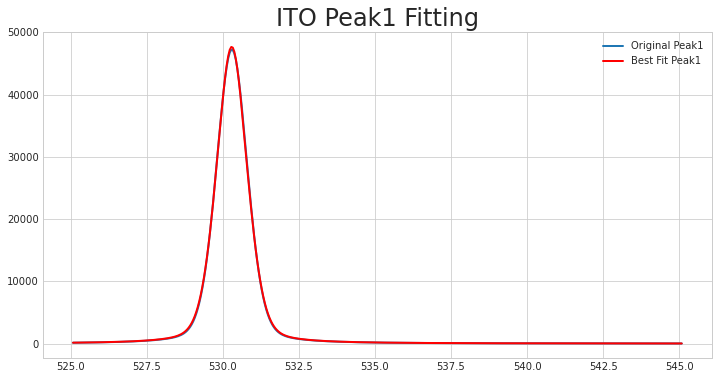

In [12]:
initial_guess = [1.2, 0.2, 45000 ] 
popt, pcov = curve_fit(voigt, peak1[:,0], peak1[:,1] - bg[:, 1], p0=initial_guess) # background removed
print(popt)


plt.figure(figsize = (12, 6))
plt.plot(peak1[:, 0], peak1[:, 1] - bg[:, 1], label = "Original Peak1", linewidth=2) # background removed
plt.plot(peak1[:,0], voigt(peak1[:,0], *popt), label = "Best Fit Peak1", color='red', linewidth=2)
plt.title("ITO Peak1 Fitting", size = 24)
plt.legend()
plt.grid(True)
plt.show();

### ITO-Peak2

In [13]:
def Gaussian(x, x0, beta, w, amp):
    return amp * (np.exp(-np.log(2) * (x - x0)**2 / (beta*w)**2))

def Lorentzian(x, x1, gamma, w, amp):
    return amp* (1 / (1 + (x - x1)**2 / (gamma*w)**2))
    
def voigt(x, beta, gamma, amp):
    x0 = 531.5
    x1 = 531.49
    w = 1.484
    result = amp * (0.7 * Gaussian(x, x0, beta, w, amp=1) + 0.3 * Lorentzian(x, x1, gamma, w, amp=1))
    return result

[5.09500063e-01 4.40710735e-01 1.77975109e+04]


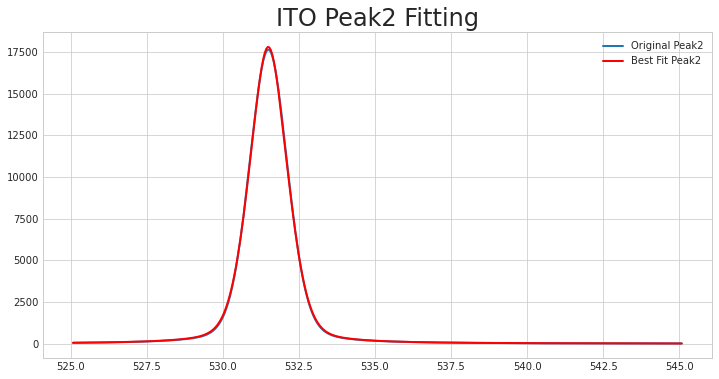

In [14]:
initial_guess = [0.2, 1.2, 17500 ] 
popt, pcov = curve_fit(voigt, peak2[:,0], peak2[:,1] - bg[:, 1], p0=initial_guess) # background removed
print(popt)


plt.figure(figsize = (12, 6))
plt.plot(peak2[:, 0], peak2[:, 1] - bg[:, 1], label = "Original Peak2", linewidth=2) # background removed
plt.plot(peak2[:,0], voigt(peak2[:,0], *popt), label = "Best Fit Peak2", color='red', linewidth=2)

plt.title("ITO Peak2 Fitting", size = 24)
plt.legend()
plt.grid(True)
plt.show();

### ITO-Peak3

In [15]:
def Gaussian(x, x0, beta, w, amp):
    return amp * (np.exp(-np.log(2) * (x - x0)**2 / (beta*w)**2))

def Lorentzian(x, x1, gamma, w, amp):
    return amp* (1 / (1 + (x - x1)**2 / (gamma*w)**2))
    
def voigt(x, beta, gamma, amp):
    x0 = 532.8
    x1 = 532.79
    w = 1.095
    result = amp * (0.7 * Gaussian(x, x0, beta, w, amp=1) + 0.3 * Lorentzian(x, x1, gamma, w, amp=1))
    return result

[5.09789031e-01 4.41127626e-01 3.03808246e+03]


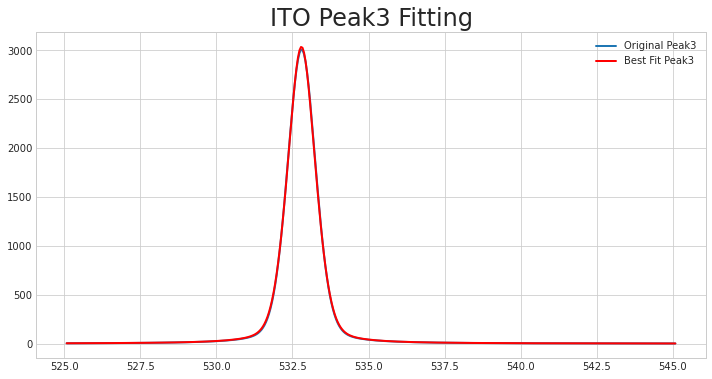

In [16]:
initial_guess = [0.2, 1.2, 3500 ] 
popt, pcov = curve_fit(voigt, peak3[:,0], peak3[:,1] - bg[:, 1], p0 = initial_guess)
print(popt)

plt.figure(figsize = (12, 6))
plt.plot(peak3[:, 0], peak3[:, 1] - bg[:, 1], label = "Original Peak3", linewidth=2)
plt.plot(peak3[:,0], voigt(peak3[:,0], *popt), label = "Best Fit Peak3", color='red', linewidth=2)

plt.title("ITO Peak3 Fitting", size = 24)
plt.legend()
plt.grid(True)
plt.show();

In [17]:
# 모두 거의 같음! 확인 ㅎㅎㅎ
# 값을 정밀하게 입력하지 않으면 오차가 커지는 것이었다!

[5.08563648e-01 -4.44264315e-01  7.92940661e+03]
[5.10542151e-01 4.39291707e-01 4.01018290e+03]

[5.09791537e-01 4.41140472e-01 4.76944215e+04]
[5.09500063e-01 4.40710735e-01 1.77975109e+04]
[5.09789031e-01 4.41127626e-01 3.03808246e+03]

SyntaxError: invalid syntax (<ipython-input-17-32e6a91729e9>, line 4)

# 2.Machine Learning Start!

## Data Generation

In [1]:
# ========== Library import ==========
import numpy as np
import random
import matplotlib.pyplot as plt
import inspect
plt.style.use(["seaborn-whitegrid"])

# ========== Parameter Matrix generation ==========
N = 3  # Maximum number of the possible peak
Data_size = 3000000

# Set of Parameters ready
Parameters = np.zeros((Data_size, N, 3)) 
print(Parameters.shape)

(3000000, 3, 3)


In [2]:
# Now we use the new model funtion : 
# voigt function = linear combination of Gaussian and Lorentzian function with some ratio 0.3

def voigt_noise(x, *args, beta = 5.09791537e-01, gamma=4.41140472e-01):
    """ it takes an x-domain and parameter list as an input, and give voigt function graph as an output."""
    amp = args[::3]
    center = args[1::3]
    width = args[2::3]
    
    result = 0
    for i in range(len(center)):
        result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))

        
    for xx in range(len(result)):
        result[xx] += 0.01* ((np.random.rand()*2) - 1)

    return result 
    

    
def voigt(x, *args, beta = 5.09791537e-01, gamma=4.41140472e-01):
    """ it takes an x-domain and parameter list as an input, and give voigt function graph as an output."""
    amp = args[::3]
    center = args[1::3]
    width = args[2::3]
    
    result = 0
    for i in range(len(center)):
        result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))

    return result 
    
    

In [3]:
# ========== x-domain range ==========
x = np.linspace(0, 15, 401) 
print(len(x))


401


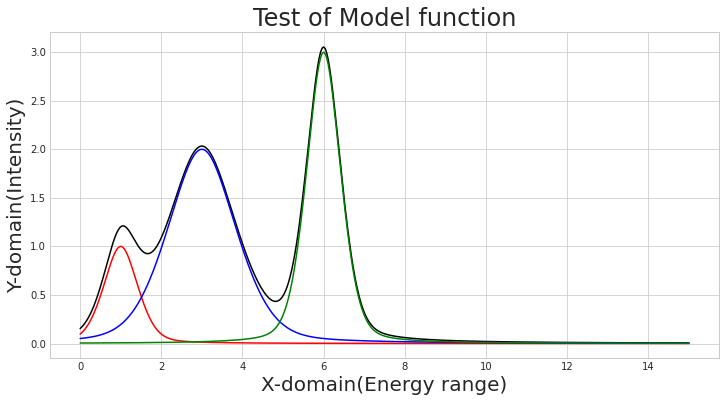

In [4]:
# ========== Checking out of the voigt function ==========
params = [1, 1, 1, 2, 3, 2, 3, 6, 1]

plt.figure(figsize = (12, 6))
plt.plot(x, voigt_noisez(x, *params), color = 'black')

plt.plot(x, voigt(x, *params[:3]), color = 'red')
plt.plot(x, voigt(x, *params[3:6]), color = 'blue')
plt.plot(x, voigt(x, *params[6:]), color = 'green')

plt.title("Test of Model function", size = 24)
plt.xlabel("X-domain(Energy range)", size = 20)
plt.ylabel("Y-domain(Intensity)", size = 20)
plt.grid(True)
plt.show()

In [5]:
# ========== Generation of Voigt function Parameters with Matrix Form ==========

for i in range(len(Parameters)): # For each matrix in Parameter set..
    for j in range(Parameters.shape[1]): # For each row in each matrix..
        
        # append three arguments that will be used in Voigt function

        center1 = 6 + 0.8*np.random.rand() - 0.4
        center2 = 8 + 0.8*np.random.rand() - 0.4
        center3 = 10 + 0.8*np.random.rand() - 0.4
        #center4 = 10 + 0.5*np.random.rand() - 0.25
        #center5 = 12 + 0.5*np.random.rand() - 0.25
        
        #                                amplitude      center        width
        Parameters[i][0] = np.array([[np.random.rand(), center1, 0.7 + 0.8*np.random.rand() ]])
        Parameters[i][1] = np.array([[np.random.rand(), center2, 0.7 + 0.8*np.random.rand() ]])
        Parameters[i][2] = np.array([[np.random.rand(), center3, 0.7 + 0.8*np.random.rand() ]])
        #Parameters[i][3] = np.array([[np.random.rand(), center4, 0.6 + 1.5*np.random.rand() ]])
        #Parameters[i][4] = np.array([[np.random.rand(), center5, 0.6 + 1.5*np.random.rand() ]])

        
# Check out
print(Parameters)  

[[[ 0.1589587   5.80239301  1.35432956]
  [ 0.77249346  7.60446931  1.34245423]
  [ 0.10735636 10.26418006  1.12200946]]

 [[ 0.07906093  6.28192892  1.45575496]
  [ 0.06126845  8.12554812  1.23571414]
  [ 0.86450996  9.74129557  1.29887101]]

 [[ 0.15272673  6.30659562  1.00597372]
  [ 0.12887824  7.79530546  1.20579444]
  [ 0.86959222 10.04545822  1.36848412]]

 ...

 [[ 0.20909757  6.09953752  1.19255175]
  [ 0.4601498   8.17434022  0.82469587]
  [ 0.15995213  9.64711567  0.97211815]]

 [[ 0.21447937  5.8112683   1.41542406]
  [ 0.31234163  7.96343892  1.37725886]
  [ 0.97027342 10.03135583  0.76910297]]

 [[ 0.82600873  5.85265452  1.04843173]
  [ 0.35491889  8.00959978  1.47392642]
  [ 0.69925093 10.39097318  1.07027091]]]


In [6]:
# ========== Data Generation ==========

GRAPH = []     # y-value of the Voigt function
AREA = []      # Area of the Voigt funtion
NUM_PEAK = []  # Number of peak
AMPLITUDE = [] # Amplitude
CENTER = []    # Center
WIDTH = []     # Width

for j in Parameters:

    peak = random.randint(2, N)  # Random selection of Possible peak number
    j = list(j.reshape((3*N, ))) # reshaping to put it as *args

    # Appending to list
    GRAPH.append(voigt_noise(x, *j[0:3*peak]))
    AREA.append(sum(voigt(x, *j[0:3*peak])))
    NUM_PEAK.append(peak)
    AMPLITUDE.append(np.array( j[0:3*peak][::3] + (N - peak)*[0]))
    CENTER.append(np.array(j[0:3*peak][1::3] + (N - peak)*[0]))
    WIDTH.append(np.array(j[0:3*peak][2::3] + (N - peak)*[0]))
    

In [7]:
# ========== Conversion to Numpy.array ==========
GRAPH = np.array(GRAPH)
AREA = np.array(AREA)
NUM_PEAK = np.array(NUM_PEAK)
AMPLITUDE = np.array(AMPLITUDE)
CENTER = np.array(CENTER)
WIDTH = np.array(WIDTH)

# ========== Checking out the shape ==========
print(GRAPH.shape)
print(AREA.shape)
print(NUM_PEAK.shape)
print(AMPLITUDE.shape)
print(CENTER.shape)
print(WIDTH.shape)

(3000000, 401)
(3000000,)
(3000000,)
(3000000, 3)
(3000000, 3)
(3000000, 3)


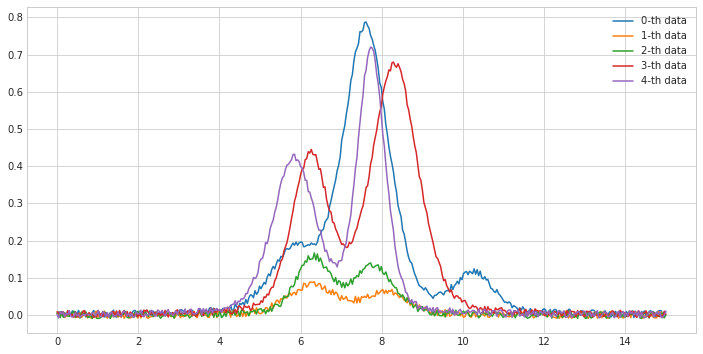

In [8]:
# ========== Generated Data sample check ==========
plt.figure(figsize = (12, 6))

for i in range(5):
    plt.plot(x, GRAPH[i], label = str(i) + '-th data')
    plt.legend()
    plt.grid(True)

In [9]:
# ========== Data spliting up into three group ==========
# ========== Training / Validation / Test ==========

# lorentzian graph
train_graph = np.array(GRAPH[:2800000])
val_graph   = np.array(GRAPH[2800000:2950000])
test_graph  = np.array(GRAPH[2950000:])

# area label
train_area = np.array(AREA[:2800000])
val_area   = np.array(AREA[2800000:2950000])
test_area  = np.array(AREA[2950000:])

# number of peak label
train_num_peak = np.array(NUM_PEAK[:2800000])
val_num_peak   = np.array(NUM_PEAK[2800000:2950000])
test_num_peak  = np.array(NUM_PEAK[2950000:])

# amplitude label
train_amp = np.array(AMPLITUDE[:2800000])
val_amp   = np.array(AMPLITUDE[2800000:2950000])
test_amp  = np.array(AMPLITUDE[2950000:])

# center label
train_center = np.array(CENTER[:2800000])
val_center   = np.array(CENTER[2800000:2950000])
test_center  = np.array(CENTER[2950000:])

# width label
train_width = np.array(WIDTH[:2800000])
val_width   = np.array(WIDTH[2800000:2950000])
test_width  = np.array(WIDTH[2950000:])

In [10]:
# ========== Size check ==========
print(train_graph.shape, train_area.shape, train_num_peak.shape, 
      train_amp.shape, train_center.shape, train_width.shape)
print(val_graph.shape, val_area.shape, val_num_peak.shape, 
      val_amp.shape, val_center.shape, val_width.shape)
print(test_graph.shape, test_area.shape, test_num_peak.shape, 
      test_amp.shape, test_center.shape, test_width.shape)


(2800000, 401) (2800000,) (2800000,) (2800000, 3) (2800000, 3) (2800000, 3)
(150000, 401) (150000,) (150000,) (150000, 3) (150000, 3) (150000, 3)
(50000, 401) (50000,) (50000,) (50000, 3) (50000, 3) (50000, 3)


In [11]:
# ========== reshape for Image-from setting ==========
# 1차원 그래프 변환

train_graph = train_graph.reshape(2800000, len(x), 1)
val_graph   = val_graph.reshape(150000, len(x), 1)
test_graph  = test_graph.reshape(50000, len(x), 1)

print(train_graph.shape)
print(val_graph.shape)
print(test_graph.shape)

(2800000, 401, 1)
(150000, 401, 1)
(50000, 401, 1)


## 2. Functional API를 활용한 비계층적 구조 신경망 작성

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 401, 1)]     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 302, 32)      3232        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, 151, 32)      0           conv1d[0][0]                     
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 102, 16)      25616       max_pooling1d[0][0]              
______________________________________________________________________________________________

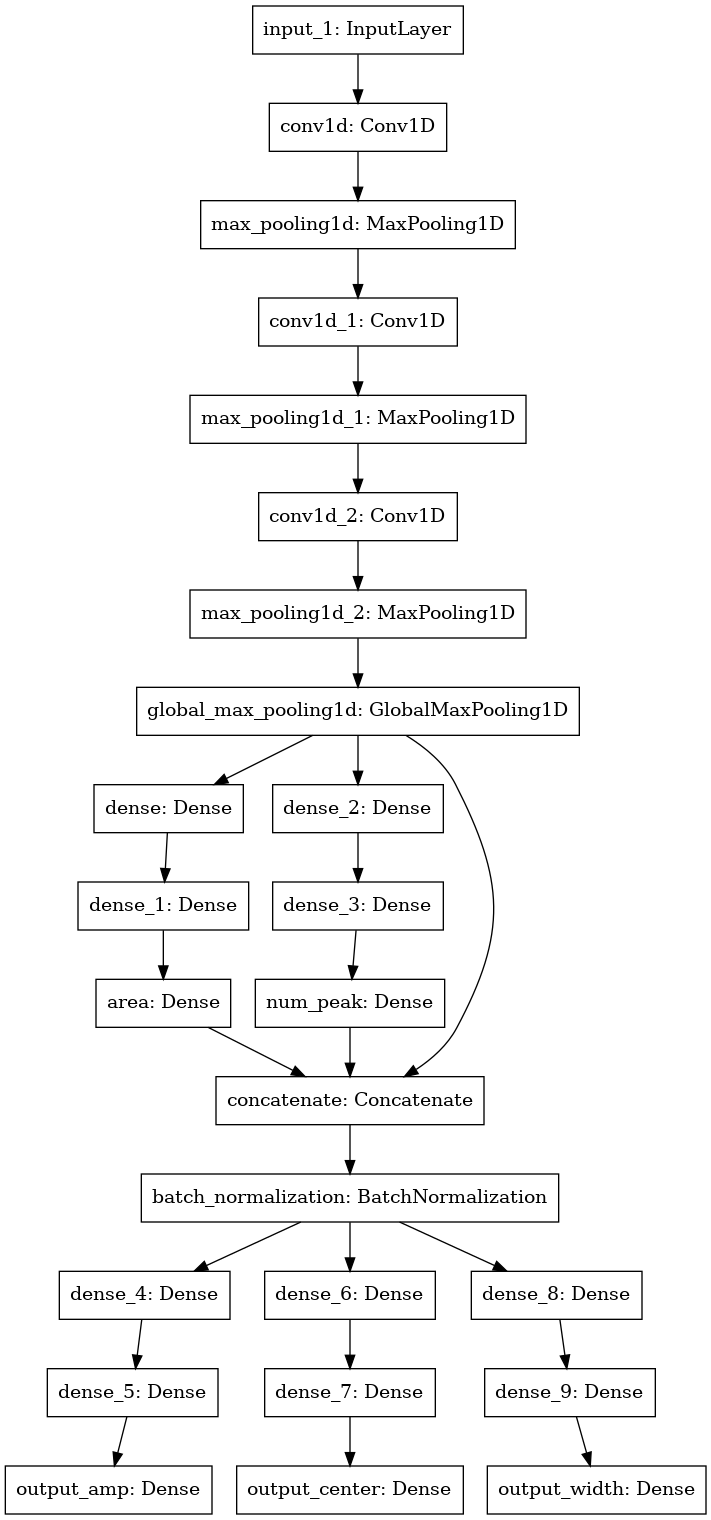

In [12]:
# 최대한 간단한 구조로 만들기!

from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, Flatten, BatchNormalization
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPooling1D, GlobalMaxPooling1D
from keras.layers.merge import concatenate

# input layer
main_inputs = Input(shape = (len(x), 1))
#main_inputs2 = BatchNormalization()(main_inputs)

# At least three Convolution layer is needed => other paper
# Adding BatchNormalization layer => we expect the effect of regularization
x_conv1 = Conv1D(32, kernel_size = 100, activation = 'relu')(main_inputs)
x_pooling1 = MaxPooling1D(pool_size = 2)(x_conv1)

x_conv2 = Conv1D(16, kernel_size = 50, activation = 'relu')(x_pooling1)
x_pooling2 = MaxPooling1D(pool_size = 2)(x_conv2)

x_conv3 = Conv1D(16, kernel_size = 25, activation = 'relu')(x_pooling2)
x_pooling3 = MaxPooling1D(pool_size = 2)(x_conv3)

x_GMpooling = GlobalMaxPooling1D()(x_pooling3)


# output : area
hidden_area1 = Dense(100, activation = 'relu')(x_GMpooling)
hidden_area2 = Dense(50, activation = 'relu')(hidden_area1)
output_area = Dense(1, activation = 'linear', name = 'area')(hidden_area2)


# output : number of peak
hidden_num_peak1 = Dense(100, activation = 'relu')(x_GMpooling)
hidden_num_peak2 = Dense(50, activation = 'relu')(hidden_num_peak1)
output_num_peak = Dense(1, activation = 'linear', name = 'num_peak')(hidden_num_peak2)


# merging features into one layer
merge = concatenate([output_area, output_num_peak, x_GMpooling])
merge2 = BatchNormalization()(merge)


# prediction output
hidden_amp1 = Dense(100, activation = 'relu')(merge2)
hidden_amp2 = Dense(50, activation = 'relu')(hidden_amp1)
output_amp = Dense(3, activation = 'linear', name = 'output_amp')(hidden_amp2)

hidden_center1 = Dense(100, activation = 'relu')(merge2)
hidden_center2 = Dense(50, activation = 'relu')(hidden_center1)
#hidden_center3 = Dense(30, activation = 'relu')(hidden_center2)
output_center = Dense(3, activation = 'linear', name = 'output_center')(hidden_center2)

hidden_width1 = Dense(100, activation = 'relu')(merge2)
hidden_width2 = Dense(50, activation = 'relu')(hidden_width1)
#hidden_width3 = Dense(30, activation = 'relu')(hidden_width2)
output_width = Dense(3, activation = 'linear', name = 'output_width')(hidden_width2)



# Definition of model with out input, five output
model = Model(inputs = main_inputs,
              outputs = [output_area, output_num_peak, output_amp, output_center, output_width])

# Summarize layers
print(model.summary())
# plot graph
plot_model(model)

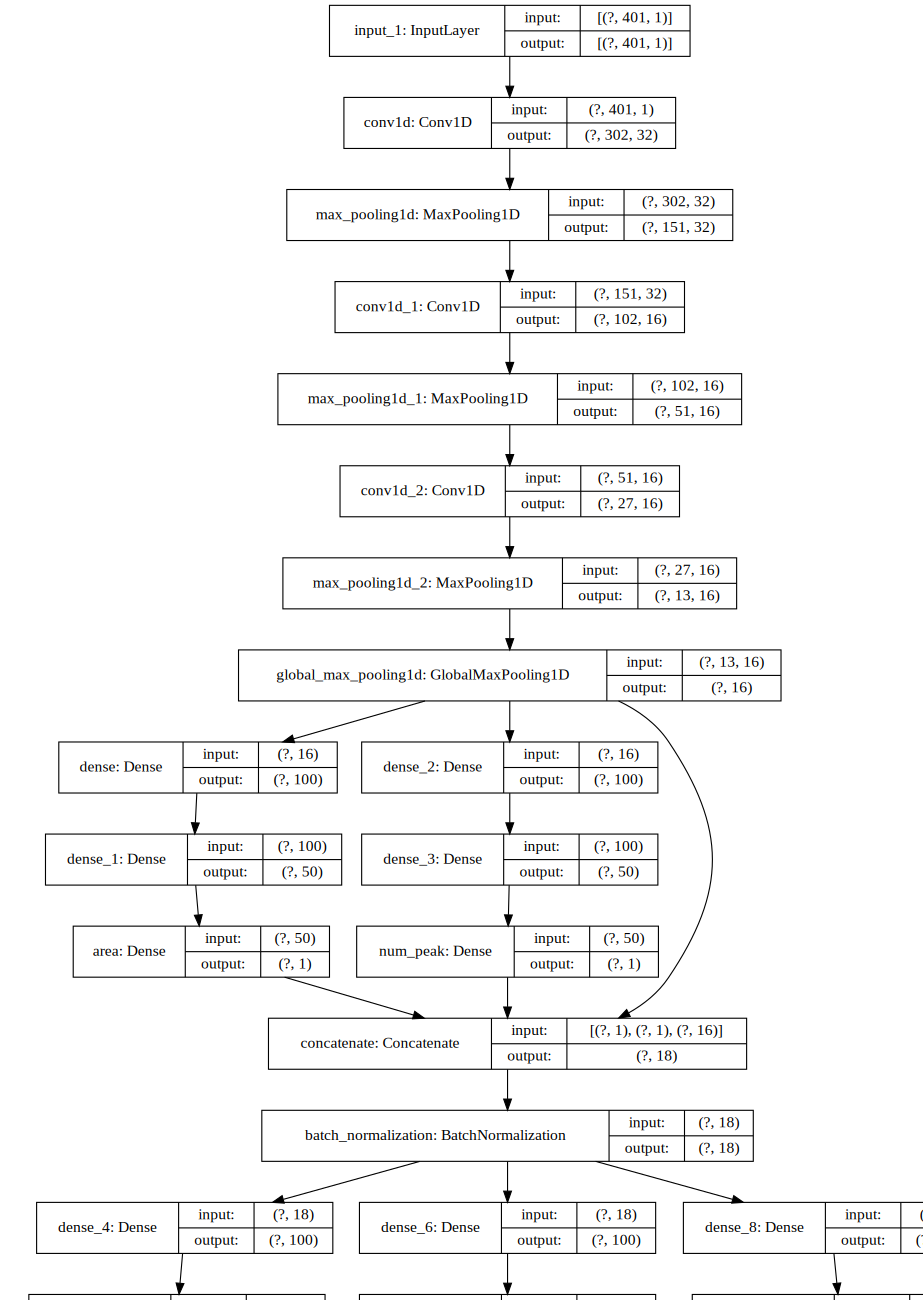

In [13]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

SVG(model_to_dot(model, show_shapes = True, expand_nested = True,
                 dpi = 65).create(prog = 'dot', format = 'svg'))


In [14]:
# 학습방법 설정
model.compile(loss = ['mse', 'mse', 'mse', 'mse', 'mse'],
              metrics = ['mae'], 
              optimizer = 'adam')


In [15]:
# 이 부분에서 콜백 함수에 넣을 콜백리스트 정의할 것!
import keras

callbacks_list = [
    # 조기종료 콜백함수 : val loss 감시, 10에폭까지 기다림
    #keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10),
    
    # 모델 체크포인트 콜백함수 : 모델을 h5로 저장, 최적 모델만을 저장
    keras.callbacks.ModelCheckpoint(filepath = "LAST_CODE_Model_2.h5", monitor = 'val_loss', save_best_only = True),
    
    # 학습률 감소 콜백함수 : val loss 감시, 검증 손실 향상안될때 10분의 1감소시킴
    keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 10)
]




In [16]:
%%time
hist = model.fit(train_graph, [train_area, train_num_peak, train_amp, train_center, train_width],
                 epochs = 85,
                 batch_size = 3000,
                 callbacks = callbacks_list,
                 validation_data = (val_graph, [val_area, val_num_peak, val_amp, val_center, val_width]),
                 verbose = 2)



Epoch 1/85
934/934 - 27s - loss: 35.6401 - area_loss: 32.1793 - num_peak_loss: 0.4558 - output_amp_loss: 0.0229 - output_center_loss: 2.9097 - output_width_loss: 0.0723 - area_mae: 1.8833 - num_peak_mae: 0.4037 - output_amp_mae: 0.1025 - output_center_mae: 0.7933 - output_width_mae: 0.1984 - val_loss: 0.3516 - val_area_loss: 0.0687 - val_num_peak_loss: 0.0167 - val_output_amp_loss: 0.0091 - val_output_center_loss: 0.2181 - val_output_width_loss: 0.0390 - val_area_mae: 0.1896 - val_num_peak_mae: 0.0911 - val_output_amp_mae: 0.0682 - val_output_center_mae: 0.2410 - val_output_width_mae: 0.1560 - lr: 0.0010
Epoch 2/85
934/934 - 28s - loss: 0.4173 - area_loss: 0.0636 - num_peak_loss: 0.0463 - output_amp_loss: 0.0083 - output_center_loss: 0.2647 - output_width_loss: 0.0344 - area_mae: 0.1726 - num_peak_mae: 0.1330 - output_amp_mae: 0.0629 - output_center_mae: 0.2401 - output_width_mae: 0.1399 - val_loss: 0.2569 - val_area_loss: 0.0315 - val_num_peak_loss: 0.0152 - val_output_amp_loss: 0.007

Epoch 15/85
934/934 - 25s - loss: 0.2115 - area_loss: 0.0895 - num_peak_loss: 0.0124 - output_amp_loss: 8.4705e-04 - output_center_loss: 0.1004 - output_width_loss: 0.0084 - area_mae: 0.1891 - num_peak_mae: 0.0727 - output_amp_mae: 0.0206 - output_center_mae: 0.0745 - output_width_mae: 0.0551 - val_loss: 0.3464 - val_area_loss: 0.0510 - val_num_peak_loss: 0.0108 - val_output_amp_loss: 0.0026 - val_output_center_loss: 0.2709 - val_output_width_loss: 0.0111 - val_area_mae: 0.1918 - val_num_peak_mae: 0.0695 - val_output_amp_mae: 0.0409 - val_output_center_mae: 0.1679 - val_output_width_mae: 0.0641 - lr: 0.0010
Epoch 16/85
934/934 - 26s - loss: 0.2089 - area_loss: 0.0910 - num_peak_loss: 0.0106 - output_amp_loss: 8.5888e-04 - output_center_loss: 0.0986 - output_width_loss: 0.0079 - area_mae: 0.2079 - num_peak_mae: 0.0677 - output_amp_mae: 0.0209 - output_center_mae: 0.0726 - output_width_mae: 0.0528 - val_loss: 0.1417 - val_area_loss: 0.0122 - val_num_peak_loss: 0.0067 - val_output_amp_los

Epoch 29/85
934/934 - 25s - loss: 0.1496 - area_loss: 0.0485 - num_peak_loss: 0.0052 - output_amp_loss: 5.4868e-04 - output_center_loss: 0.0906 - output_width_loss: 0.0048 - area_mae: 0.1527 - num_peak_mae: 0.0355 - output_amp_mae: 0.0166 - output_center_mae: 0.0581 - output_width_mae: 0.0378 - val_loss: 0.1143 - val_area_loss: 0.0100 - val_num_peak_loss: 0.0063 - val_output_amp_loss: 4.7972e-04 - val_output_center_loss: 0.0921 - val_output_width_loss: 0.0054 - val_area_mae: 0.0790 - val_num_peak_mae: 0.0473 - val_output_amp_mae: 0.0161 - val_output_center_mae: 0.0605 - val_output_width_mae: 0.0437 - lr: 0.0010
Epoch 30/85
934/934 - 25s - loss: 0.1494 - area_loss: 0.0489 - num_peak_loss: 0.0050 - output_amp_loss: 5.7360e-04 - output_center_loss: 0.0901 - output_width_loss: 0.0048 - area_mae: 0.1511 - num_peak_mae: 0.0339 - output_amp_mae: 0.0169 - output_center_mae: 0.0584 - output_width_mae: 0.0378 - val_loss: 0.1237 - val_area_loss: 0.0141 - val_num_peak_loss: 0.0046 - val_output_amp

Epoch 43/85
934/934 - 25s - loss: 0.1308 - area_loss: 0.0383 - num_peak_loss: 0.0031 - output_amp_loss: 4.9898e-04 - output_center_loss: 0.0851 - output_width_loss: 0.0039 - area_mae: 0.1393 - num_peak_mae: 0.0171 - output_amp_mae: 0.0161 - output_center_mae: 0.0493 - output_width_mae: 0.0328 - val_loss: 0.1282 - val_area_loss: 0.0146 - val_num_peak_loss: 0.0027 - val_output_amp_loss: 0.0042 - val_output_center_loss: 0.1006 - val_output_width_loss: 0.0060 - val_area_mae: 0.0955 - val_num_peak_mae: 0.0123 - val_output_amp_mae: 0.0494 - val_output_center_mae: 0.0715 - val_output_width_mae: 0.0477 - lr: 0.0010
Epoch 44/85
934/934 - 26s - loss: 0.0931 - area_loss: 0.0072 - num_peak_loss: 0.0025 - output_amp_loss: 2.2382e-04 - output_center_loss: 0.0801 - output_width_loss: 0.0030 - area_mae: 0.0671 - num_peak_mae: 0.0091 - output_amp_mae: 0.0107 - output_center_mae: 0.0393 - output_width_mae: 0.0255 - val_loss: 0.0936 - val_area_loss: 0.0071 - val_num_peak_loss: 0.0025 - val_output_amp_los

Epoch 57/85
934/934 - 25s - loss: 0.0898 - area_loss: 0.0066 - num_peak_loss: 0.0024 - output_amp_loss: 1.6667e-04 - output_center_loss: 0.0780 - output_width_loss: 0.0027 - area_mae: 0.0644 - num_peak_mae: 0.0069 - output_amp_mae: 0.0092 - output_center_mae: 0.0358 - output_width_mae: 0.0228 - val_loss: 0.0910 - val_area_loss: 0.0065 - val_num_peak_loss: 0.0024 - val_output_amp_loss: 1.1639e-04 - val_output_center_loss: 0.0793 - val_output_width_loss: 0.0026 - val_area_mae: 0.0641 - val_num_peak_mae: 0.0069 - val_output_amp_mae: 0.0076 - val_output_center_mae: 0.0355 - val_output_width_mae: 0.0221 - lr: 1.0000e-05
Epoch 58/85
934/934 - 26s - loss: 0.0899 - area_loss: 0.0066 - num_peak_loss: 0.0024 - output_amp_loss: 1.6803e-04 - output_center_loss: 0.0780 - output_width_loss: 0.0027 - area_mae: 0.0644 - num_peak_mae: 0.0068 - output_amp_mae: 0.0093 - output_center_mae: 0.0358 - output_width_mae: 0.0228 - val_loss: 0.0923 - val_area_loss: 0.0065 - val_num_peak_loss: 0.0025 - val_output

Epoch 71/85
934/934 - 25s - loss: 0.0893 - area_loss: 0.0065 - num_peak_loss: 0.0024 - output_amp_loss: 1.6272e-04 - output_center_loss: 0.0777 - output_width_loss: 0.0026 - area_mae: 0.0640 - num_peak_mae: 0.0064 - output_amp_mae: 0.0091 - output_center_mae: 0.0355 - output_width_mae: 0.0226 - val_loss: 0.0909 - val_area_loss: 0.0065 - val_num_peak_loss: 0.0024 - val_output_amp_loss: 1.1525e-04 - val_output_center_loss: 0.0793 - val_output_width_loss: 0.0026 - val_area_mae: 0.0638 - val_num_peak_mae: 0.0065 - val_output_amp_mae: 0.0076 - val_output_center_mae: 0.0349 - val_output_width_mae: 0.0218 - lr: 1.0000e-06
Epoch 72/85
934/934 - 25s - loss: 0.0894 - area_loss: 0.0065 - num_peak_loss: 0.0024 - output_amp_loss: 1.6389e-04 - output_center_loss: 0.0778 - output_width_loss: 0.0026 - area_mae: 0.0640 - num_peak_mae: 0.0064 - output_amp_mae: 0.0092 - output_center_mae: 0.0355 - output_width_mae: 0.0226 - val_loss: 0.0908 - val_area_loss: 0.0065 - val_num_peak_loss: 0.0024 - val_output

Epoch 85/85
934/934 - 25s - loss: 0.0893 - area_loss: 0.0065 - num_peak_loss: 0.0024 - output_amp_loss: 1.6226e-04 - output_center_loss: 0.0777 - output_width_loss: 0.0026 - area_mae: 0.0639 - num_peak_mae: 0.0063 - output_amp_mae: 0.0091 - output_center_mae: 0.0354 - output_width_mae: 0.0226 - val_loss: 0.0908 - val_area_loss: 0.0065 - val_num_peak_loss: 0.0024 - val_output_amp_loss: 1.1270e-04 - val_output_center_loss: 0.0792 - val_output_width_loss: 0.0026 - val_area_mae: 0.0637 - val_num_peak_mae: 0.0064 - val_output_amp_mae: 0.0075 - val_output_center_mae: 0.0347 - val_output_width_mae: 0.0217 - lr: 1.0000e-07
CPU times: user 1h 5min 8s, sys: 45min 25s, total: 1h 50min 34s
Wall time: 36min 21s


In [43]:
for key in hist.history.keys():
    print(key)  # list of every loss function names

loss
area_loss
num_peak_loss
output_amp_loss
output_center_loss
output_width_loss
area_mae
num_peak_mae
output_amp_mae
output_center_mae
output_width_mae
val_loss
val_area_loss
val_num_peak_loss
val_output_amp_loss
val_output_center_loss
val_output_width_loss
val_area_mae
val_num_peak_mae
val_output_amp_mae
val_output_center_mae
val_output_width_mae
lr


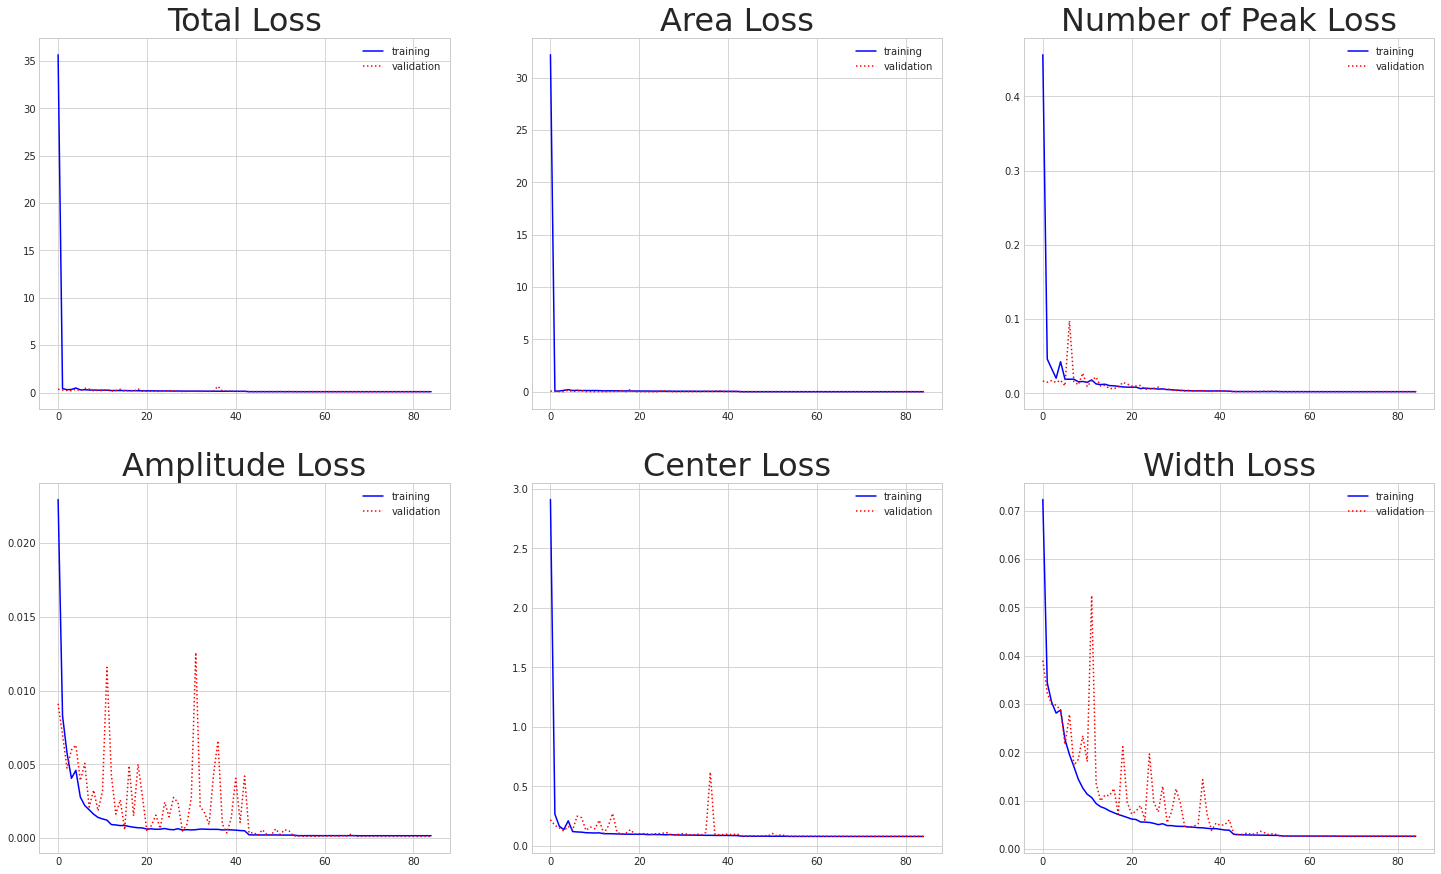

In [44]:
plt.figure(figsize = (25, 15))

plt.subplot(231)
plt.plot(hist.history['loss'], 'b-', label = 'training')
plt.plot(hist.history['val_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Total Loss", size = 32)
plt.legend()

plt.subplot(232)
plt.plot(hist.history['area_loss'], 'b-', label = 'training')
plt.plot(hist.history['val_area_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Area Loss", size = 32)
plt.legend()

plt.subplot(233)
plt.plot(hist.history['num_peak_loss'], 'b-', label = 'training')
plt.plot(hist.history['val_num_peak_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Number of Peak Loss", size = 32)
plt.legend()

plt.subplot(234)
plt.plot(hist.history['output_amp_loss'], 'b-', label = 'training')
plt.plot(hist.history['val_output_amp_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Amplitude Loss", size = 32)
plt.legend()

plt.subplot(235)
plt.plot(hist.history['output_center_loss'], 'b-', label = 'training')
plt.plot(hist.history['val_output_center_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Center Loss", size = 32)
plt.legend()

plt.subplot(236)
plt.plot(hist.history['output_width_loss'], 'b-', label = 'training')
plt.plot(hist.history['val_output_width_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Width Loss", size = 32)
plt.legend()



### Test data

In [45]:
print(test_graph.shape)

(50000, 401, 1)


In [46]:
prediction = model.predict(test_graph)
print(len(prediction))

5


In [47]:
print(prediction[0].shape)  # area
print(prediction[1].shape)  # num_peak
print(prediction[2].shape)  # amplitude
print(prediction[3].shape)  # center
print(prediction[4].shape)  # width

(50000, 1)
(50000, 1)
(50000, 3)
(50000, 3)
(50000, 3)


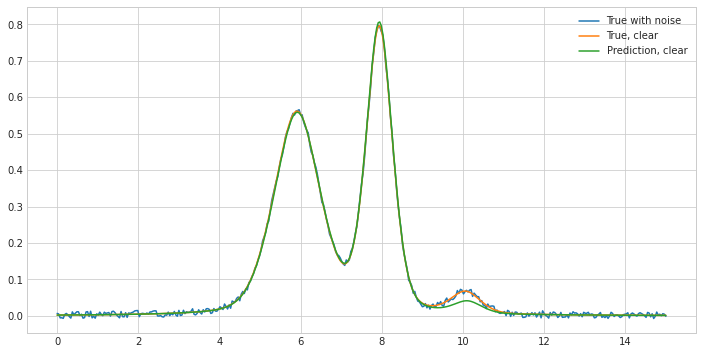

Predicted area: [43.813274]
     True area: 43.75126339811262
Predicted num_peak: [3.0045485]
     True num_peak: 3
Predicted amplitude: [0.55232257 0.79282755 0.03234299]
     True amplitude: [0.55565192 0.78220681 0.05865483]
Predicted center: [ 5.915368  7.939268 10.113316]
     True center: [ 5.90777401  7.93835461 10.06387608]
Predicted width: [1.3643148  0.7766645  0.82785255]
     True width: [1.36244307 0.7780516  0.87411352]


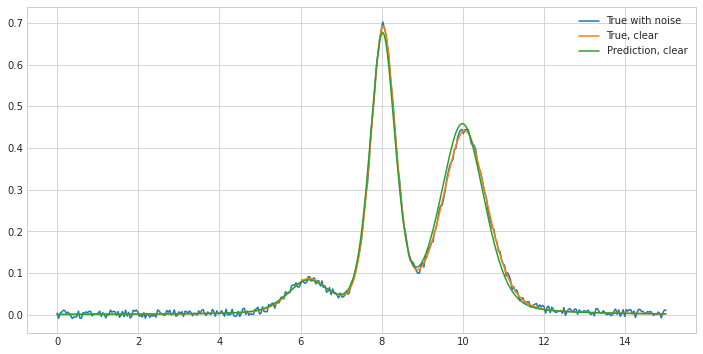

Predicted area: [36.126316]
     True area: 36.25448767155163
Predicted num_peak: [3.0009894]
     True num_peak: 3
Predicted amplitude: [0.07450984 0.6645166  0.45295998]
     True amplitude: [0.07755272 0.68095866 0.43604063]
Predicted center: [6.1759496 8.019533  9.988386 ]
     True center: [ 6.18543435  8.03217887 10.04618358]
Predicted width: [1.2195344 0.7482244 1.2998108]
     True width: [1.15722561 0.73462619 1.34053305]


<ipython-input-2-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


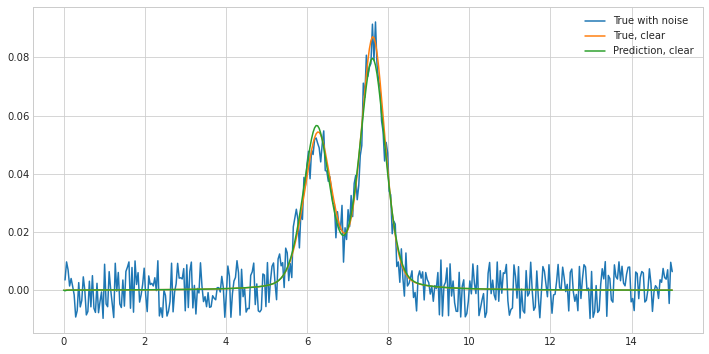

Predicted area: [3.2189672]
     True area: 3.2524360456264874
Predicted num_peak: [1.996418]
     True num_peak: 2
Predicted amplitude: [ 0.05532956  0.07868915 -0.00127313]
     True amplitude: [0.0531067  0.08602475 0.        ]
Predicted center: [6.237183   7.615649   0.05236217]
     True center: [6.27181226 7.6261012  0.        ]
Predicted width: [0.7888345  0.75855327 0.01821727]
     True width: [0.82862896 0.70694768 0.        ]


<ipython-input-2-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


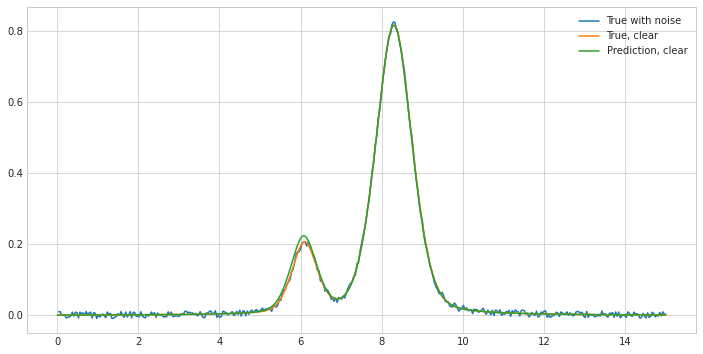

Predicted area: [31.618076]
     True area: 31.511088772905754
Predicted num_peak: [2.005412]
     True num_peak: 2
Predicted amplitude: [ 2.1375506e-01  8.1500942e-01 -3.1271949e-04]
     True amplitude: [0.19641693 0.81614707 0.        ]
Predicted center: [6.0750804  8.298461   0.03633615]
     True center: [6.09608038 8.30066815 0.        ]
Predicted width: [0.7698084  1.0625405  0.00691164]
     True width: [0.74555081 1.06937588 0.        ]


<ipython-input-2-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


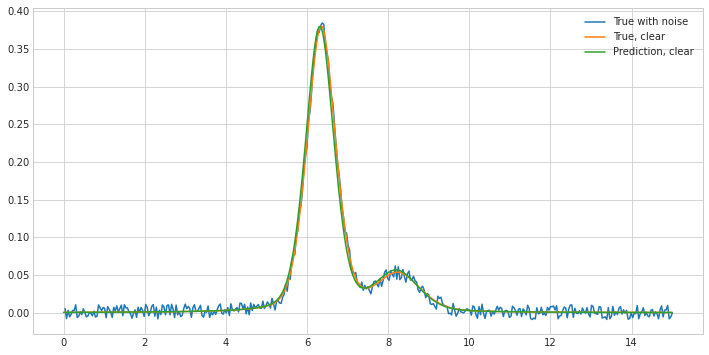

Predicted area: [11.9313345]
     True area: 11.90605544463373
Predicted num_peak: [2.004888]
     True num_peak: 2
Predicted amplitude: [ 3.7873229e-01  5.2636795e-02 -3.1805038e-04]
     True amplitude: [0.37915029 0.04957673 0.        ]
Predicted center: [6.314302   8.212552   0.00982901]
     True center: [6.35191993 8.24743186 0.        ]
Predicted width: [0.8381693  1.2854857  0.00388007]
     True width: [0.84346465 1.30700917 0.        ]


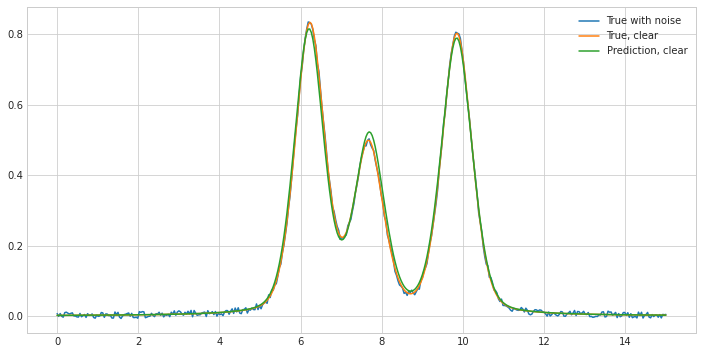

Predicted area: [56.89738]
     True area: 56.815815578040656
Predicted num_peak: [2.9994802]
     True num_peak: 3
Predicted amplitude: [0.8034615 0.4993101 0.7822755]
     True amplitude: [0.8217076  0.47544874 0.79633184]
Predicted center: [6.205154  7.6959496 9.84708  ]
     True center: [6.22837049 7.67496474 9.85149082]
Predicted width: [0.8781048  0.88194263 0.91585594]
     True width: [0.86565441 0.87121775 0.89078684]


<ipython-input-2-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


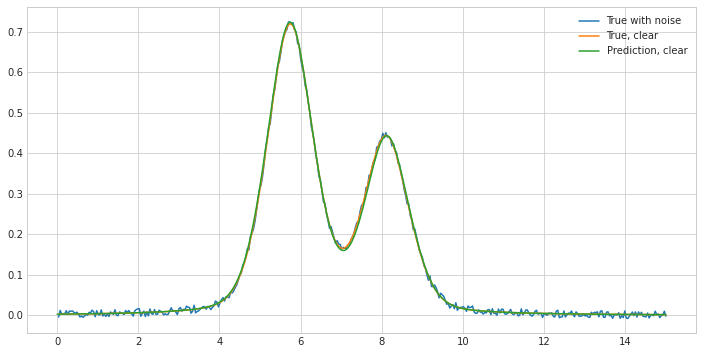

Predicted area: [47.34581]
     True area: 47.40591466488789
Predicted num_peak: [2.00036]
     True num_peak: 2
Predicted amplitude: [0.71606416 0.43025115 0.00178817]
     True amplitude: [0.71191268 0.43128856 0.        ]
Predicted center: [5.739821  8.127758  0.0117428]
     True center: [5.74460127 8.10978081 0.        ]
Predicted width: [1.3689002  1.312752   0.00279731]
     True width: [1.35977816 1.32793679 0.        ]


<ipython-input-2-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


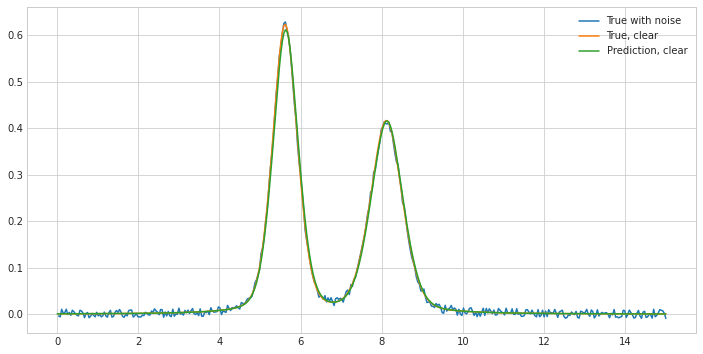

Predicted area: [26.122042]
     True area: 26.130061195955175
Predicted num_peak: [2.0008435]
     True num_peak: 2
Predicted amplitude: [ 6.0870665e-01  4.1296285e-01 -1.6472861e-04]
     True amplitude: [0.62086464 0.41397718 0.        ]
Predicted center: [5.6318192e+00 8.1284142e+00 3.6174953e-03]
     True center: [5.6158892  8.11505946 0.        ]
Predicted width: [0.74082035 0.9391465  0.0025201 ]
     True width: [0.73118305 0.94006373 0.        ]


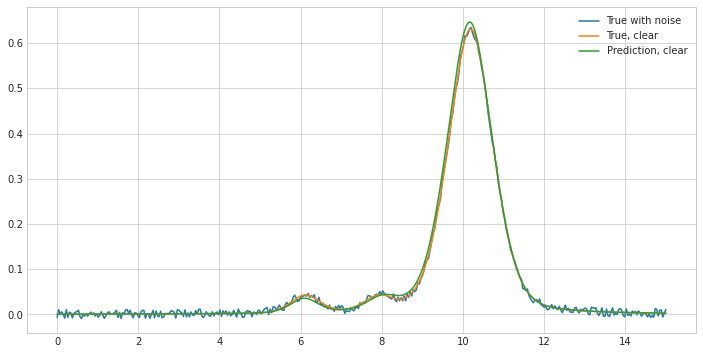

Predicted area: [27.432745]
     True area: 27.44109233845859
Predicted num_peak: [2.9939237]
     True num_peak: 3
Predicted amplitude: [0.0315816  0.02965953 0.6462609 ]
     True amplitude: [0.03922105 0.0314817  0.63100214]
Predicted center: [ 6.0868654  8.0231085 10.167237 ]
     True center: [ 6.11327584  7.92275593 10.18878248]
Predicted width: [0.81345177 0.92593217 1.3337712 ]
     True width: [0.85282541 0.84002422 1.31980359]


<ipython-input-2-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


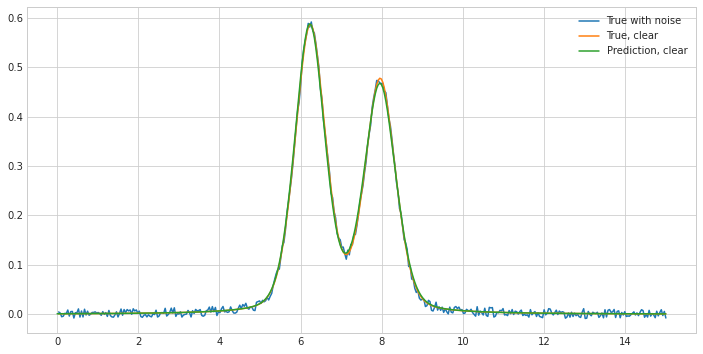

Predicted area: [29.403933]
     True area: 29.393784009505218
Predicted num_peak: [2.0080037]
     True num_peak: 2
Predicted amplitude: [5.8009154e-01 4.5864990e-01 3.0804425e-05]
     True amplitude: [0.57942824 0.46877543 0.        ]
Predicted center: [6.226043   7.9548674  0.08075497]
     True center: [6.23841273 7.96136251 0.        ]
Predicted width: [0.89657515 0.94079155 0.01101749]
     True width: [0.90277137 0.90910806 0.        ]


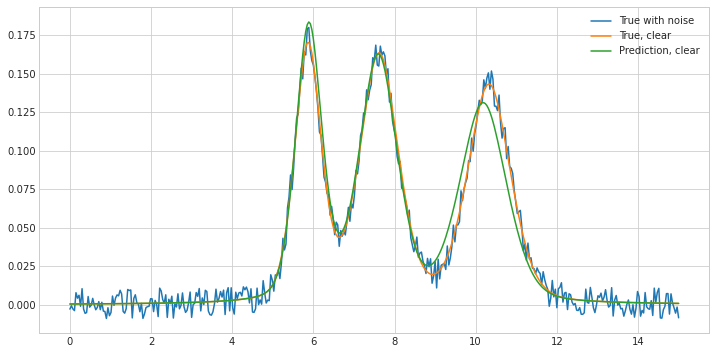

Predicted area: [15.28903]
     True area: 15.180751580362548
Predicted num_peak: [2.9840798]
     True num_peak: 3
Predicted amplitude: [0.1790409  0.15891144 0.12931605]
     True amplitude: [0.16607679 0.16011948 0.14153639]
Predicted center: [ 5.888202  7.599319 10.186146]
     True center: [ 5.86846099  7.61916581 10.3292514 ]
Predicted width: [0.7760022 1.1241928 1.3815185]
     True width: [0.78407284 1.13943059 1.26660585]


<ipython-input-2-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


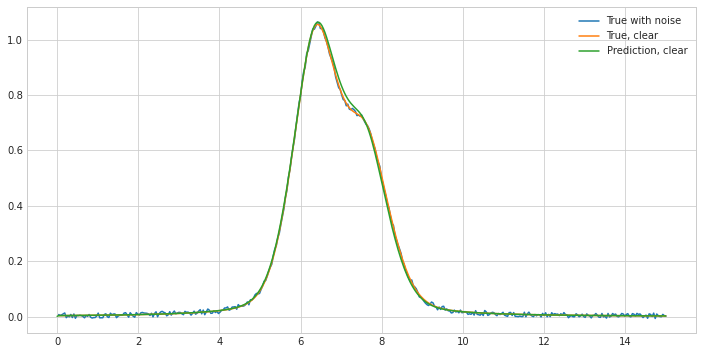

Predicted area: [63.999992]
     True area: 64.01084818731972
Predicted num_peak: [1.9972677]
     True num_peak: 2
Predicted amplitude: [ 0.9830089   0.573215   -0.00348488]
     True amplitude: [0.98095563 0.58427213 0.        ]
Predicted center: [ 6.3672957e+00  7.6031170e+00 -4.2982399e-03]
     True center: [6.36168088 7.63284111 0.        ]
Predicted width: [1.3395885  1.3422146  0.01297937]
     True width: [1.3186315  1.34436818 0.        ]


<ipython-input-2-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


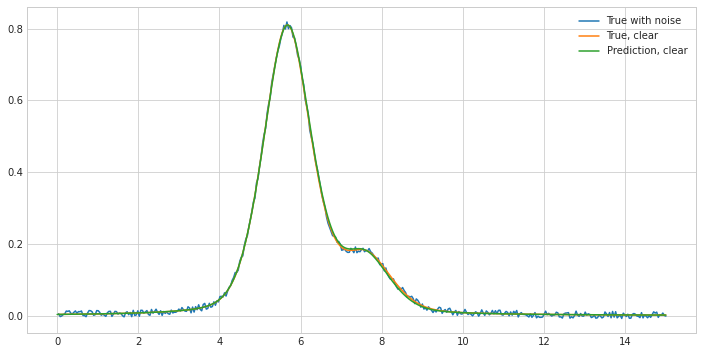

Predicted area: [42.02487]
     True area: 42.04095367090077
Predicted num_peak: [2.0025477]
     True num_peak: 2
Predicted amplitude: [0.80418646 0.15501484 0.00198376]
     True amplitude: [0.80403842 0.15574162 0.        ]
Predicted center: [5.675922   7.581519   0.02322826]
     True center: [5.66923763 7.60956233 0.        ]
Predicted width: [1.4221168  1.4488871  0.00247997]
     True width: [1.41192879 1.49588157 0.        ]


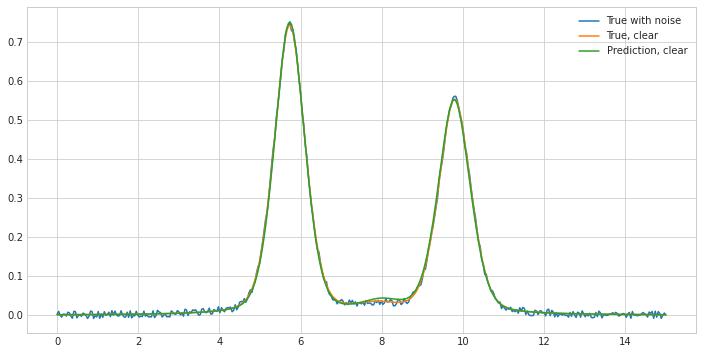

Predicted area: [37.77674]
     True area: 37.77348171072244
Predicted num_peak: [3.0001698]
     True num_peak: 3
Predicted amplitude: [0.74977547 0.02920824 0.5500421 ]
     True amplitude: [0.74170686 0.02160853 0.55182284]
Predicted center: [5.731466  7.9983945 9.784825 ]
     True center: [5.72987368 7.88400655 9.79633261]
Predicted width: [0.8884195 1.2218952 0.9453248]
     True width: [0.90875924 1.33345801 0.93932459]


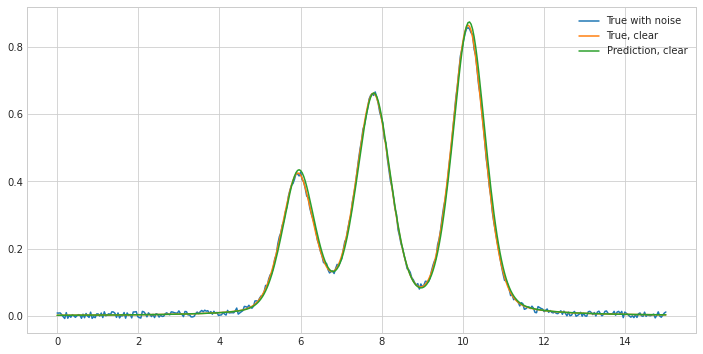

Predicted area: [58.605663]
     True area: 58.635439372114405
Predicted num_peak: [3.0009212]
     True num_peak: 3
Predicted amplitude: [0.42118198 0.64884573 0.86685973]
     True amplitude: [0.41152973 0.64832557 0.85679533]
Predicted center: [ 5.9569626  7.8041167 10.1536875]
     True center: [ 5.92969945  7.79094029 10.12826997]
Predicted width: [0.9519471 1.0166188 0.9743658]
     True width: [0.96110574 1.0292798  0.97370338]


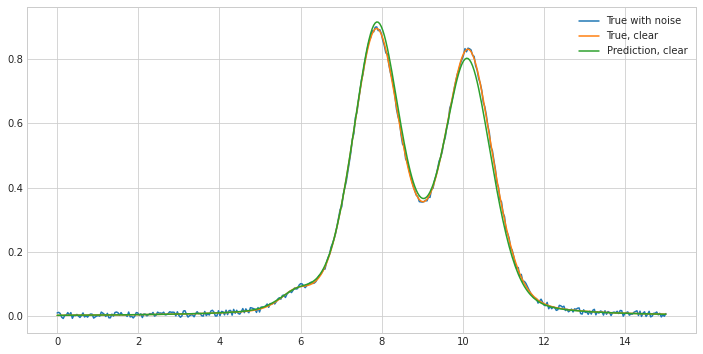

Predicted area: [76.71461]
     True area: 76.71791387584558
Predicted num_peak: [2.9974546]
     True num_peak: 3
Predicted amplitude: [0.05356405 0.8955843  0.7806841 ]
     True amplitude: [0.0538146  0.87529603 0.81027412]
Predicted center: [ 5.9288745  7.8793163 10.106788 ]
     True center: [ 5.89274208  7.86615399 10.12946585]
Predicted width: [1.09575   1.4454525 1.4508529]
     True width: [0.94819328 1.44763192 1.45624497]


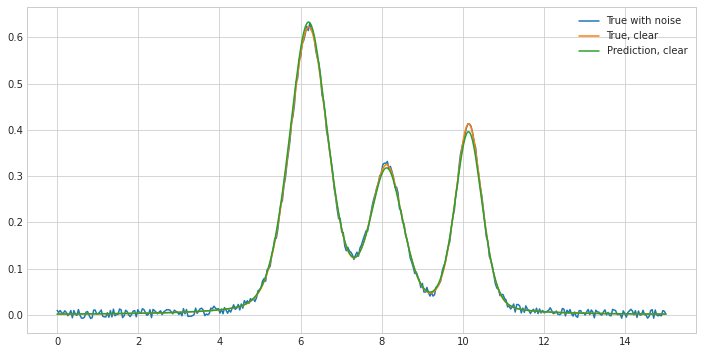

Predicted area: [41.007652]
     True area: 41.02964547327884
Predicted num_peak: [2.9998083]
     True num_peak: 3
Predicted amplitude: [0.6279021  0.30197707 0.38925853]
     True amplitude: [0.61712721 0.30905753 0.40632859]
Predicted center: [ 6.1948905  8.122733  10.137586 ]
     True center: [ 6.19860268  8.12168842 10.14083671]
Predicted width: [1.1462595  0.9889713  0.80775726]
     True width: [1.14443696 0.97784202 0.78540661]


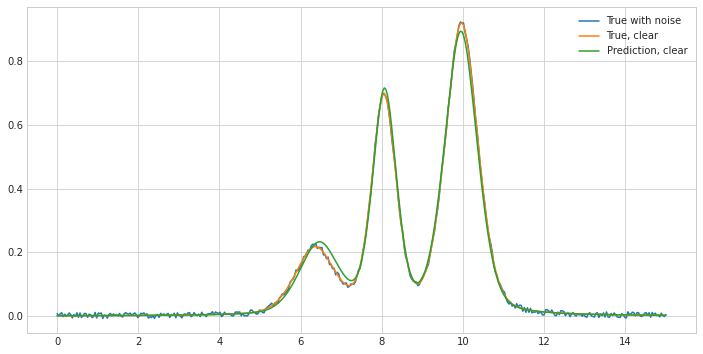

Predicted area: [49.948452]
     True area: 49.94152948068937
Predicted num_peak: [3.0013003]
     True num_peak: 3
Predicted amplitude: [0.22195505 0.69607556 0.8877843 ]
     True amplitude: [0.20752487 0.67948306 0.91376651]
Predicted center: [6.455751  8.06914   9.9507265]
     True center: [6.35233373 8.05537706 9.96644292]
Predicted width: [1.1743381 0.7030214 0.9700357]
     True width: [1.17252978 0.72337204 0.96245114]


<ipython-input-2-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


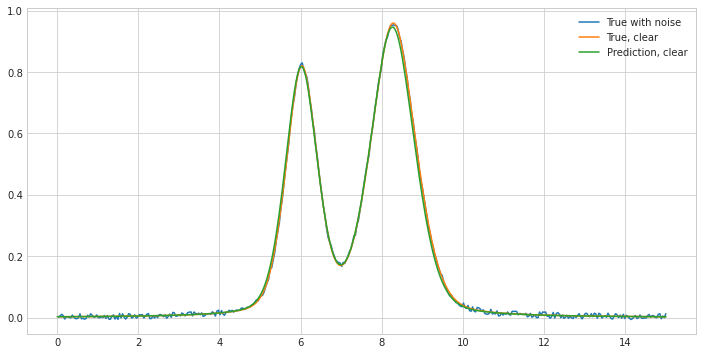

Predicted area: [61.923412]
     True area: 61.89991776053193
Predicted num_peak: [2.0027137]
     True num_peak: 2
Predicted amplitude: [8.012124e-01 9.390235e-01 8.559339e-04]
     True amplitude: [0.80293633 0.95262575 0.        ]
Predicted center: [6.016079   8.264755   0.03784725]
     True center: [6.02909831 8.28566057 0.        ]
Predicted width: [0.9574754  1.301755   0.00809485]
     True width: [0.9334532  1.31942325 0.        ]


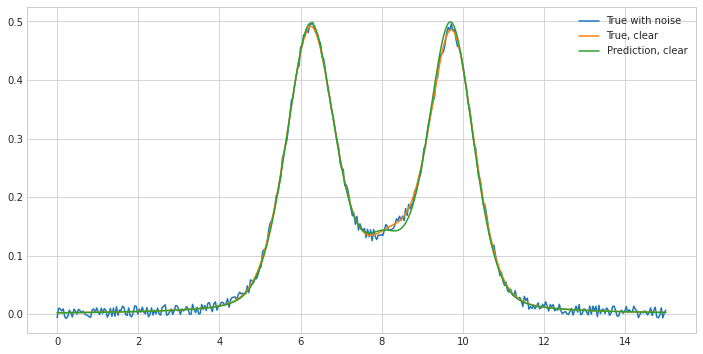

Predicted area: [46.004322]
     True area: 46.08036479916688
Predicted num_peak: [2.9992304]
     True num_peak: 3
Predicted amplitude: [0.4905431  0.09846453 0.49080682]
     True amplitude: [0.48396466 0.1020968  0.47306799]
Predicted center: [6.2513785 8.040739  9.695344 ]
     True center: [6.24726363 8.17816309 9.72254929]
Predicted width: [1.4460167 1.25367   1.3434706]
     True width: [1.47096532 1.45127453 1.35181385]


<ipython-input-2-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


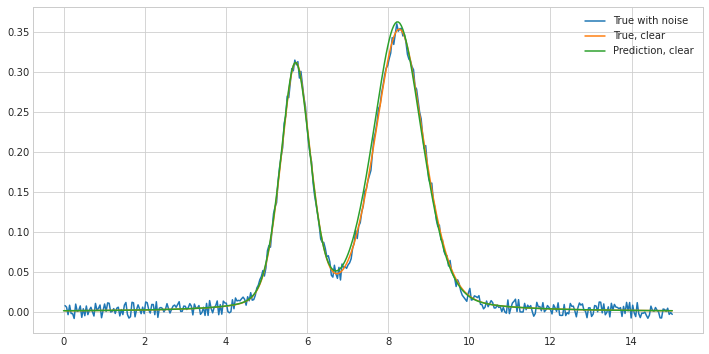

Predicted area: [24.213776]
     True area: 24.1907284643579
Predicted num_peak: [2.0051966]
     True num_peak: 2
Predicted amplitude: [0.30486208 0.3601913  0.00076548]
     True amplitude: [0.30539739 0.35113395 0.        ]
Predicted center: [5.7153563 8.232179  0.0305334]
     True center: [5.72269958 8.27294406 0.        ]
Predicted width: [0.8906321  1.4679773  0.00702655]
     True width: [0.89071667 1.46119482 0.        ]


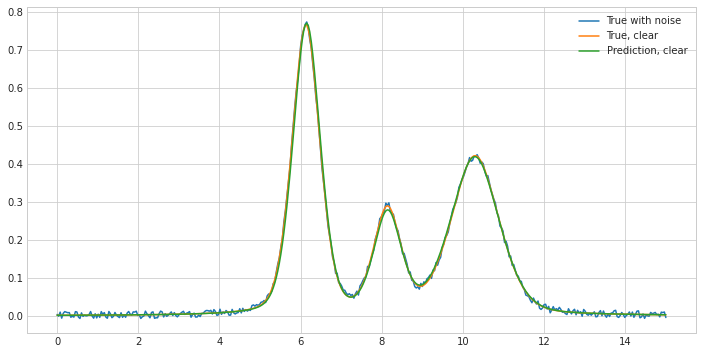

Predicted area: [44.539738]
     True area: 44.34389616808453
Predicted num_peak: [2.9987392]
     True num_peak: 3
Predicted amplitude: [0.7658608  0.2615236  0.41559097]
     True amplitude: [0.7618801  0.27262756 0.41821759]
Predicted center: [ 6.1482754  8.143775  10.293625 ]
     True center: [ 6.13113565  8.13841997 10.30154783]
Predicted width: [0.8094255  0.81597024 1.4345243 ]
     True width: [0.81936974 0.81363708 1.412406  ]


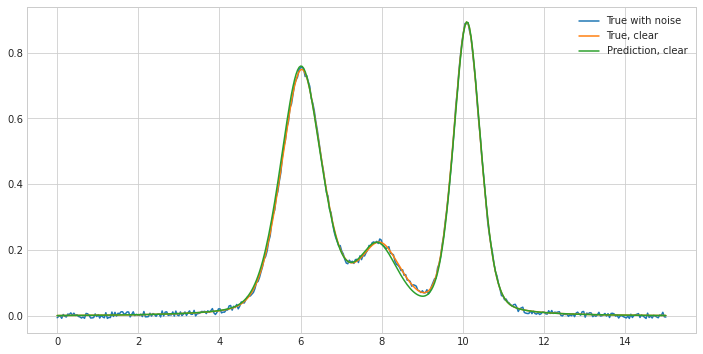

Predicted area: [57.623848]
     True area: 57.60297841950852
Predicted num_peak: [2.9990344]
     True num_peak: 3
Predicted amplitude: [0.75258416 0.19975889 0.88619864]
     True amplitude: [0.74193571 0.20132072 0.88488752]
Predicted center: [ 6.008731  7.893814 10.100372]
     True center: [ 6.02517636  7.9474315  10.09604193]
Predicted width: [1.2269785 1.1985626 0.7948203]
     True width: [1.21682923 1.27826359 0.79707786]


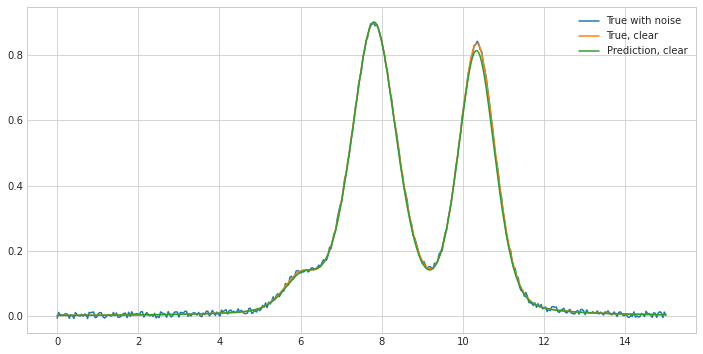

Predicted area: [67.9165]
     True area: 67.84520296784464
Predicted num_peak: [3.0005674]
     True num_peak: 3
Predicted amplitude: [0.10229221 0.89031583 0.7995178 ]
     True amplitude: [0.1042864  0.8892729  0.82185247]
Predicted center: [ 6.0367074  7.8061657 10.335377 ]
     True center: [ 5.99787528  7.80644036 10.34438627]
Predicted width: [1.0656611 1.3284633 1.0919311]
     True width: [1.02991628 1.34802148 1.09034081]


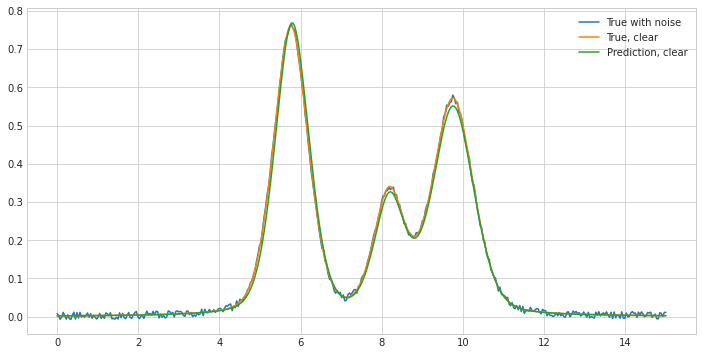

Predicted area: [53.530304]
     True area: 53.7239020718049
Predicted num_peak: [2.9984083]
     True num_peak: 3
Predicted amplitude: [0.7636922  0.29668534 0.5430483 ]
     True amplitude: [0.75518917 0.31064256 0.56348456]
Predicted center: [5.7913604 8.193761  9.76189  ]
     True center: [5.75906481 8.18072559 9.75477494]
Predicted width: [1.0056244 0.8970182 1.2240689]
     True width: [1.02665812 0.89876093 1.21723727]


<ipython-input-2-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


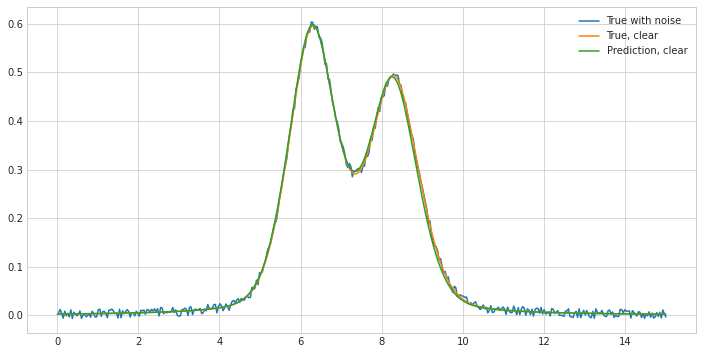

Predicted area: [46.725365]
     True area: 46.69937205808012
Predicted num_peak: [1.9968525]
     True num_peak: 2
Predicted amplitude: [ 0.58229077  0.47295046 -0.00216806]
     True amplitude: [0.57971029 0.47679044 0.        ]
Predicted center: [6.286266e+00 8.269488e+00 4.634112e-03]
     True center: [6.29407431 8.30090211 0.        ]
Predicted width: [ 1.4121523   1.459199   -0.00426312]
     True width: [1.40586557 1.4768627  0.        ]


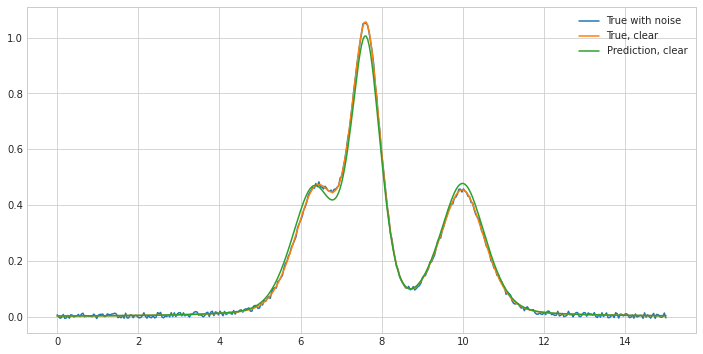

Predicted area: [62.36094]
     True area: 62.26351107092661
Predicted num_peak: [2.9998264]
     True num_peak: 3
Predicted amplitude: [0.44066036 0.9540005  0.46720588]
     True amplitude: [0.43907811 0.99510268 0.44390282]
Predicted center: [6.322473  7.6090827 9.994277 ]
     True center: [6.39425491 7.61358696 9.98437448]
Predicted width: [1.2978425  0.87445724 1.3299323 ]
     True width: [1.30128782 0.85969044 1.33096481]


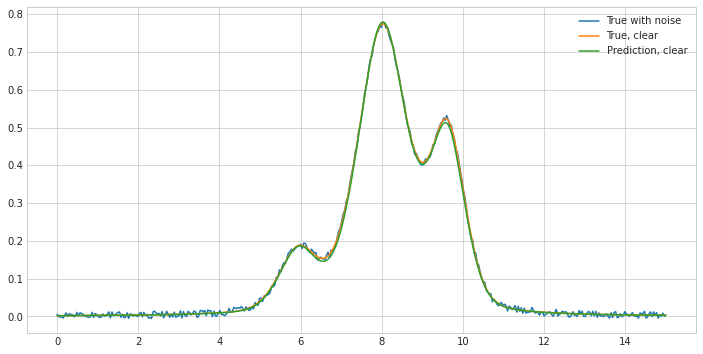

Predicted area: [55.223354]
     True area: 55.182254493977766
Predicted num_peak: [3.001391]
     True num_peak: 3
Predicted amplitude: [0.16219193 0.7662618  0.4561808 ]
     True amplitude: [0.16261714 0.76178477 0.46461859]
Predicted center: [5.947675 8.022333 9.614333]
     True center: [5.94869211 8.02380906 9.62593388]
Predicted width: [1.1217049 1.4513117 1.0342315]
     True width: [1.14857054 1.48269381 1.0250731 ]


<ipython-input-2-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


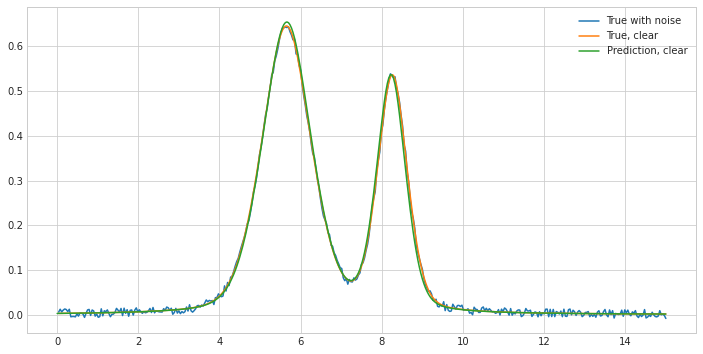

Predicted area: [43.123707]
     True area: 43.0607868667981
Predicted num_peak: [2.0077524]
     True num_peak: 2
Predicted amplitude: [ 0.65130085  0.5258235  -0.00067132]
     True amplitude: [0.64247993 0.5257685  0.        ]
Predicted center: [5.659586   8.230951   0.06639692]
     True center: [5.64822167 8.26238239 0.        ]
Predicted width: [1.445185   0.85441095 0.00179176]
     True width: [1.45938589 0.87615262 0.        ]


<ipython-input-2-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-2-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


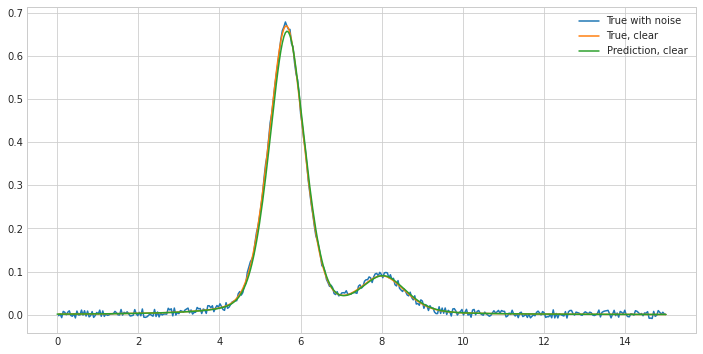

Predicted area: [25.102997]
     True area: 25.05038497202932
Predicted num_peak: [1.9997014]
     True num_peak: 2
Predicted amplitude: [0.6555565  0.08337346 0.00493639]
     True amplitude: [0.6682063  0.08295272 0.        ]
Predicted center: [5.6666684  8.045905   0.01272795]
     True center: [5.64523531 8.01880144 0.        ]
Predicted width: [1.0462784  1.3538003  0.00656638]
     True width: [1.04651282 1.35198111 0.        ]


In [48]:
for i in range(30):
    
    test_amp[i] = np.array(test_amp[i])
    test_center[i] = np.array(test_center[i])
    test_width[i] = np.array(test_width[i])
    
    test_params = np.stack((test_amp[i], test_center[i], test_width[i]))
    test_params = test_params.T.reshape(9)
    test_params = list(test_params)
    
    #########################################################
    prediction[2][i] = np.array(prediction[2][i])
    prediction[3][i] = np.array(prediction[3][i])
    prediction[4][i] = np.array(prediction[4][i])
    
    predict_params = np.stack((prediction[2][i], prediction[3][i], prediction[4][i]))
    predict_params = predict_params.T.reshape(9)
    predict_params = list(predict_params)
    
    ########################################################
    print('======================================================================')
    plt.figure(figsize = (12, 6))
    plt.plot(x, voigt_noise(x, *test_params), label = 'True with noise')
    plt.plot(x, voigt(x, *test_params), label = 'True, clear')
    plt.plot(x, voigt(x, *predict_params), label = 'Prediction, clear')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    print("Predicted area:", prediction[0][i])
    print("     True area:", test_area[i])

    print("Predicted num_peak:", prediction[1][i])
    print("     True num_peak:", test_num_peak[i])

    print("Predicted amplitude:", prediction[2][i])
    print("     True amplitude:", test_amp[i] )

    print("Predicted center:", prediction[3][i])
    print("     True center:", test_center[i])

    print("Predicted width:", prediction[4][i])
    print("     True width:", test_width[i])
    print('======================================================================')
    
    

# Real XPS data fitting

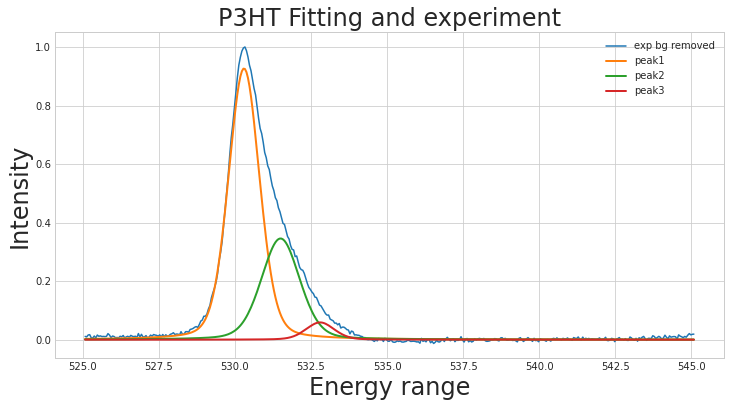

In [49]:
plt.style.use(["seaborn-whitegrid"])
plt.figure(figsize = (12, 6))

# only three peaks
bg = np.loadtxt("ITO_O1s_bg.txt")
exp = np.loadtxt("ITO_O1s_exp.txt")
fitting = np.loadtxt("ITO_O1s_fitting.txt")
peak1 = np.loadtxt("ITO_O1s_p1.txt")
peak2 = np.loadtxt("ITO_O1s_p2.txt")
peak3 = np.loadtxt("ITO_O1s_p3.txt")

# 테스트하고자 하는 실제 XPS 데이터의 parameter 범위가 너무 크므로 
# 네트워크 자체는 작은 규모의 파라미터 범위에서 학습시키고,
# 테스트할 경우, 범위를 줄인 xps 데이터를 불러와서 테스트해본다..

# exp data에서 background를 제거하고, peak 높이를 1로 normalize한다.
plt.plot(exp[:, 0], (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed")

#plt.plot(fitting[:, 0], fitting[:, 1] - bg[:, 1], label = "fitting", linewidth = 2)

# 마찬가지로 개별 peak도 크기를 줄인다.
plt.plot(peak1[:, 0], (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2)
plt.plot(peak2[:, 0], (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak2", linewidth = 2)
plt.plot(peak3[:, 0], (peak3[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = 'peak3', linewidth = 2)

plt.grid(True)
plt.title("P3HT Fitting and experiment", size = 24)
plt.xlabel("Energy range", size = 24)
plt.ylabel("Intensity", size = 24)
plt.legend()
plt.show()


In [50]:
# normalize된 그래프의 y값

test_result = ((exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max())).reshape((1, 401, 1))
print(test_result.shape)

(1, 401, 1)


In [51]:
predict = model.predict(test_result)
print(predict)


[array([[39.05225]], dtype=float32), array([[2.4132824]], dtype=float32), array([[-0.19727507,  0.47356042,  0.97936594]], dtype=float32), array([[4.4653587, 8.461015 , 4.574015 ]], dtype=float32), array([[ 0.8484078 ,  1.663995  , -0.94870347]], dtype=float32)]


In [52]:
new_predict = []

for element in predict:
    new_predict.append(element.reshape((element.shape[1])))

In [53]:
new_predict

[array([39.05225], dtype=float32),
 array([2.4132824], dtype=float32),
 array([-0.19727507,  0.47356042,  0.97936594], dtype=float32),
 array([4.4653587, 8.461015 , 4.574015 ], dtype=float32),
 array([ 0.8484078 ,  1.663995  , -0.94870347], dtype=float32)]

In [54]:
print(new_predict[0].shape)  # area
print(new_predict[1].shape)  # num_peak
print(new_predict[2].shape)  # amplitude
print(new_predict[3].shape)  # center
print(new_predict[4].shape)  # width

(1,)
(1,)
(3,)
(3,)
(3,)


In [55]:
peak_1 = [new_predict[2][0], new_predict[3][0], new_predict[4][0]]
peak_2 = [new_predict[2][1], new_predict[3][1], new_predict[4][1]]
peak_3 = [new_predict[2][2], new_predict[3][2], new_predict[4][2]]

predict_params = peak_1 + peak_2 + peak_3

# 비교

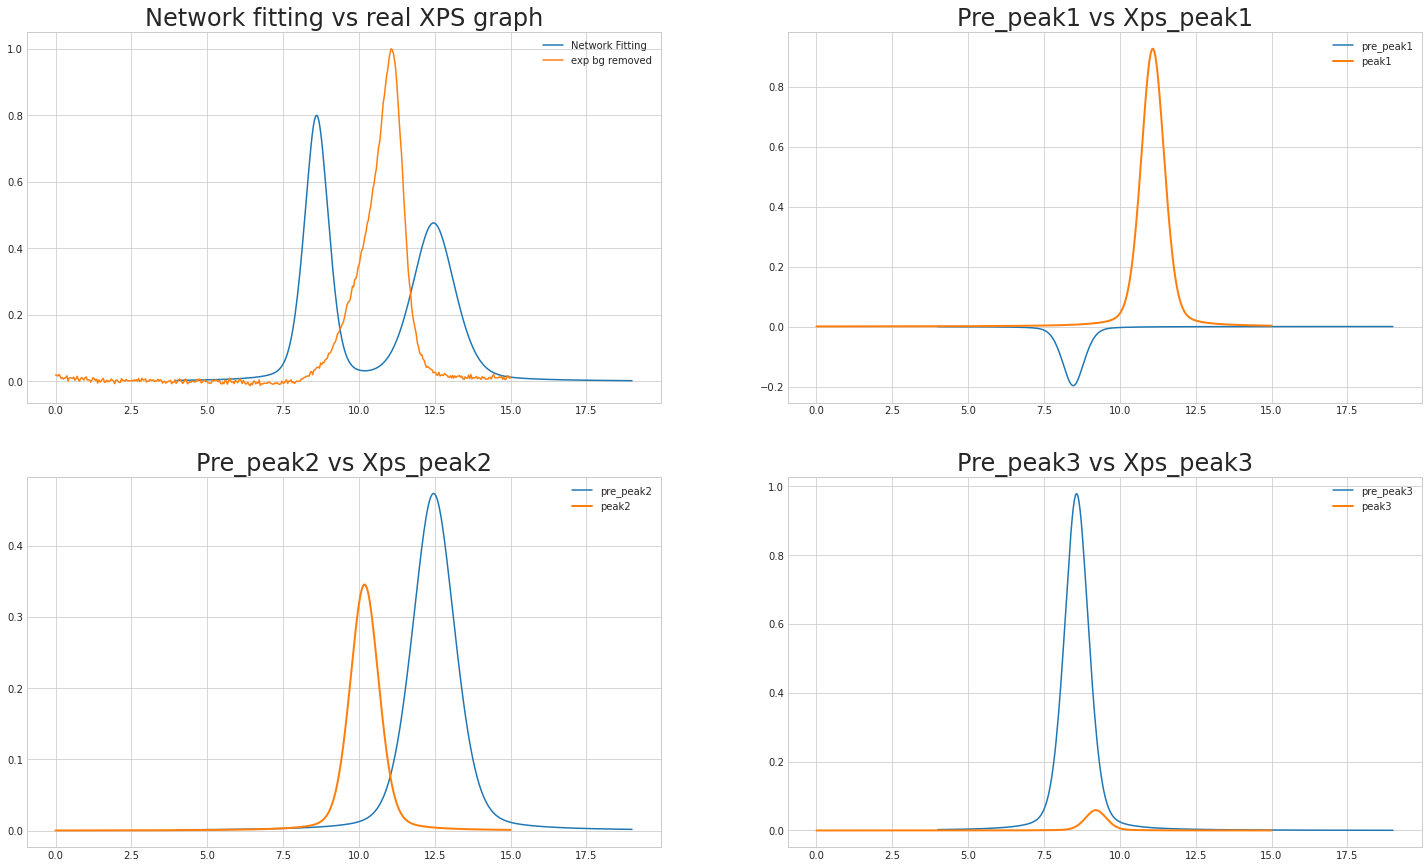

In [56]:
plt.figure(figsize = (25, 15))

plt.subplot(221)
plt.plot(x+4, voigt(x, *predict_params), label = 'Network Fitting')
plt.plot(x, (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed")
plt.title("Network fitting vs real XPS graph", size = 24)
plt.legend()


plt.subplot(222)
plt.plot(x+4, voigt(x, *predict_params[:3]), label = 'pre_peak1')
plt.plot(x, (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2)
plt.title("Pre_peak1 vs Xps_peak1", size = 24)
plt.legend()


plt.subplot(223)
plt.plot(x+4, voigt(x, *predict_params[3:6]), label = 'pre_peak2')
plt.plot(x, (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak2", linewidth = 2)
plt.title("Pre_peak2 vs Xps_peak2", size = 24)
plt.legend()


plt.subplot(224)
plt.plot(x+4, voigt(x, *predict_params[6:]), label = 'pre_peak3')
plt.plot(x, (peak3[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = 'peak3', linewidth = 2)
plt.title("Pre_peak3 vs Xps_peak3", size = 24)
plt.legend()
plt.show()




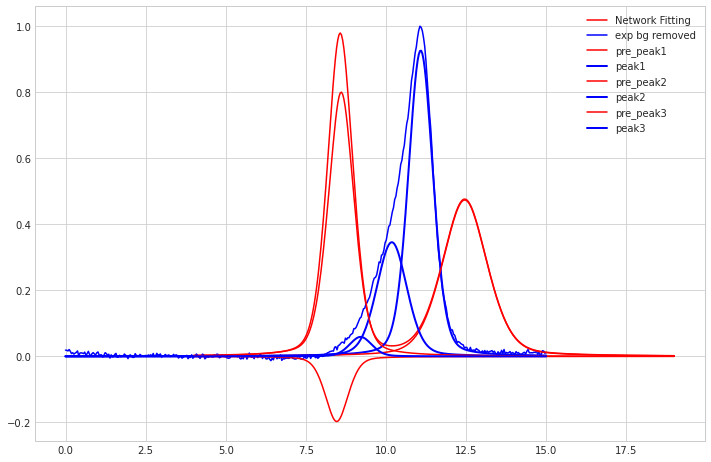

In [57]:
plt.figure(figsize = (12, 8))

plt.plot(x+4, voigt(x, *predict_params), label = 'Network Fitting', color = 'red')
plt.plot(x, (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed",  color = 'blue')


plt.plot(x+4, voigt(x, *predict_params[:3]), label = 'pre_peak1',  color = 'red')
plt.plot(x, (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2, color = 'blue')


plt.plot(x+4, voigt(x, *predict_params[3:6]), label = 'pre_peak2',  color = 'red')
plt.plot(x, (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak2", linewidth = 2, color = 'blue')

plt.plot(x+4, voigt(x, *predict_params[6:]), label = 'pre_peak3',  color = 'red')
plt.plot(x, (peak3[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = 'peak3', linewidth = 2, color = 'blue')

plt.legend()
plt.show()



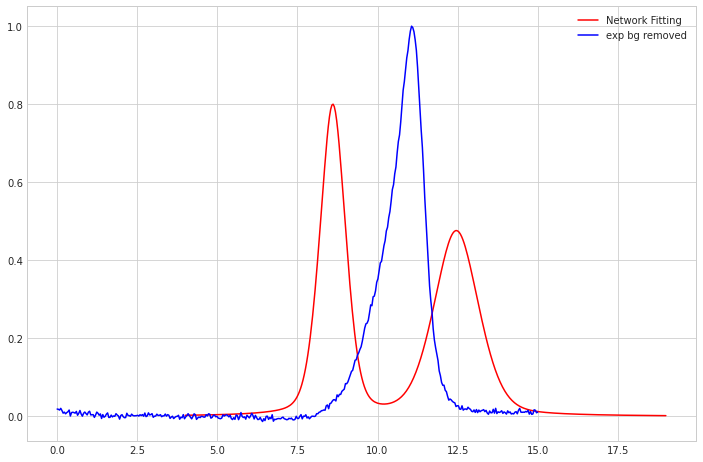

In [58]:
plt.figure(figsize = (12, 8))

plt.plot(x+4, voigt(x, *predict_params), label = 'Network Fitting', color = 'red')
plt.plot(x, (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed",  color = 'blue')

plt.legend()
plt.show()



In [59]:
# only two peak
bg = np.loadtxt("P3HT_S2p_bg.txt")
exp = np.loadtxt("P3HT_S2p_exp.txt")
fitting = np.loadtxt("P3HT_S2p_fitting.txt")
peak1 = np.loadtxt("P3HT_S2p_p1.txt")
peak2 = np.loadtxt("P3HT_S2p_p2.txt")

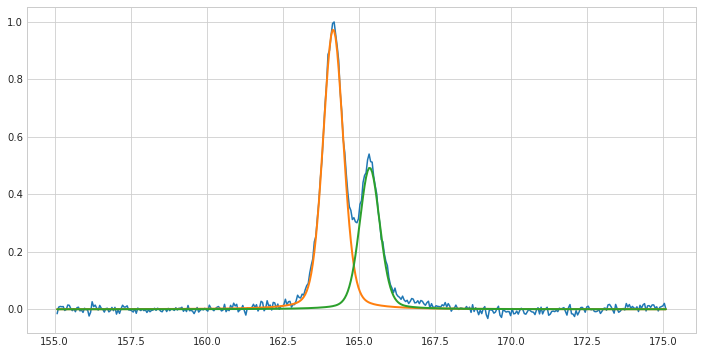

In [60]:
plt.figure(figsize = (12, 6))

# exp data에서 background를 제거하고, peak 높이를 1로 normalize한다.
plt.plot(exp[:, 0], (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed")

# 마찬가지로 개별 peak도 크기를 줄인다.
plt.plot(peak1[:, 0], (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2)
plt.plot(peak2[:, 0], (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak2", linewidth = 2)


In [61]:
# normalize된 그래프의 y값
test_result = ((exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max())).reshape((1, 401, 1))
print(test_result.shape)

(1, 401, 1)


In [62]:
predict = model.predict(test_result)
print(predict)

[array([[27.994028]], dtype=float32), array([[1.9989505]], dtype=float32), array([[0.40881884, 0.49047667, 0.072942  ]], dtype=float32), array([[ 6.591468  ,  8.354596  , -0.07416458]], dtype=float32), array([[0.9982742 , 0.719559  , 0.24496648]], dtype=float32)]


In [63]:
new_predict = []

for element in predict:
    new_predict.append(element.reshape((element.shape[1])))

In [64]:
new_predict

[array([27.994028], dtype=float32),
 array([1.9989505], dtype=float32),
 array([0.40881884, 0.49047667, 0.072942  ], dtype=float32),
 array([ 6.591468  ,  8.354596  , -0.07416458], dtype=float32),
 array([0.9982742 , 0.719559  , 0.24496648], dtype=float32)]

In [65]:
print(new_predict[0].shape)  # area
print(new_predict[1].shape)  # num_peak
print(new_predict[2].shape)  # amplitude
print(new_predict[3].shape)  # center
print(new_predict[4].shape)  # width

(1,)
(1,)
(3,)
(3,)
(3,)


In [66]:
peak_1 = [new_predict[2][0], new_predict[3][0], new_predict[4][0]]
peak_2 = [new_predict[2][1], new_predict[3][1], new_predict[4][1]]
peak_3 = [new_predict[2][2], new_predict[3][2], new_predict[4][2]]

predict_params = peak_1 + peak_2 + peak_3

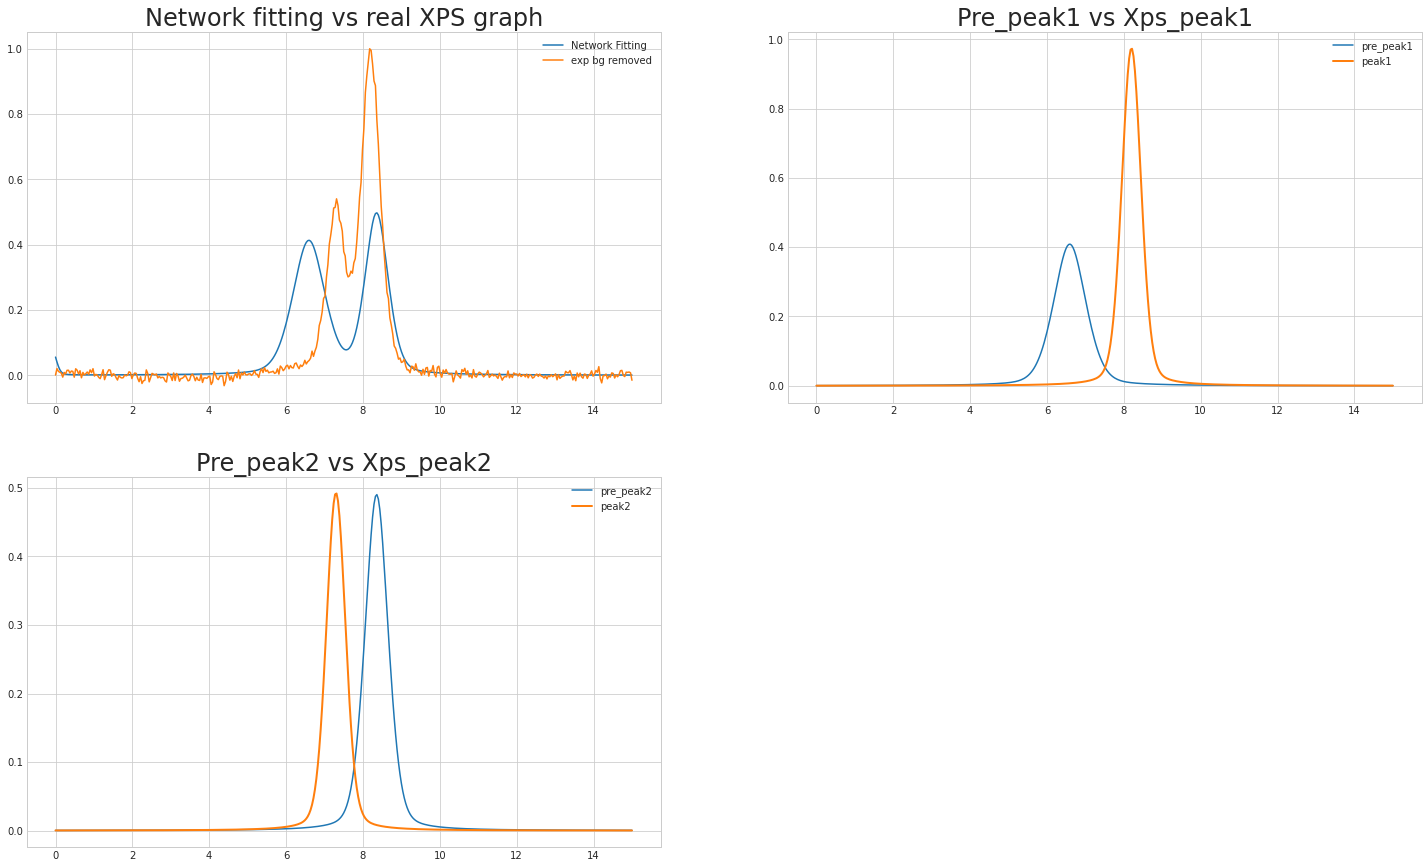

In [71]:
plt.figure(figsize = (25, 15))

plt.subplot(221)
plt.plot(x, voigt(x, *predict_params), label = 'Network Fitting')
plt.plot(x, (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed")
plt.title("Network fitting vs real XPS graph", size = 24)
plt.legend()


plt.subplot(222)
plt.plot(x, voigt(x, *predict_params[:3]), label = 'pre_peak1')
plt.plot(x, (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2)
plt.title("Pre_peak1 vs Xps_peak1", size = 24)
plt.legend()


plt.subplot(223)
plt.plot(x, voigt(x, *predict_params[3:6]), label = 'pre_peak2')
plt.plot(x, (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak2", linewidth = 2)
plt.title("Pre_peak2 vs Xps_peak2", size = 24)
plt.legend()


#plt.subplot(224)
#plt.plot(x+4, voigt(x, *predict_params[6:]), label = 'pre_peak3')
#plt.plot(x, (peak3[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = 'peak3', linewidth = 2)
#plt.title("Pre_peak3 vs Xps_peak3", size = 24)
#plt.legend()
#plt.show()



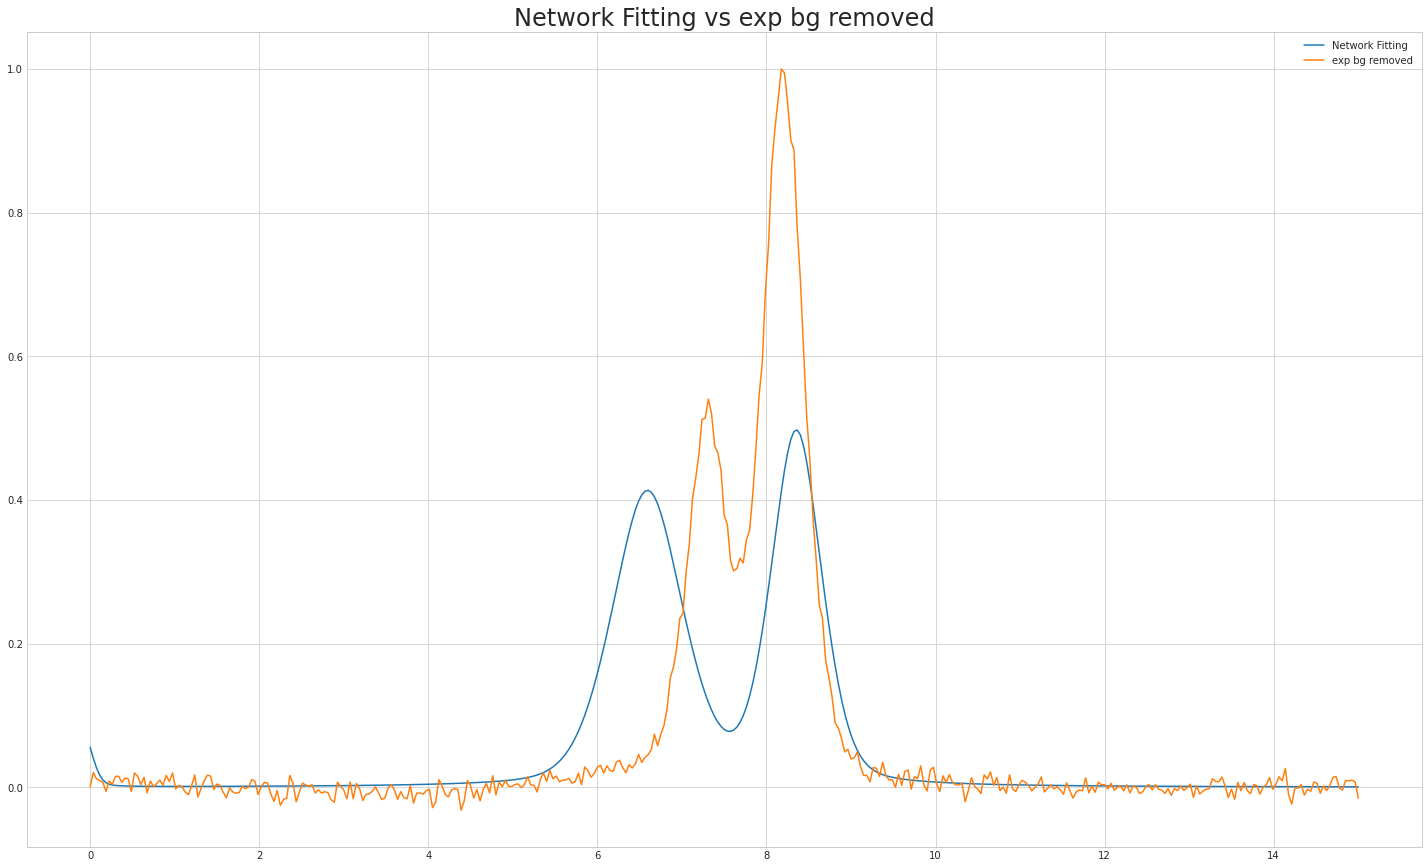

In [72]:
plt.figure(figsize = (25, 15))

plt.plot(x, voigt(x, *predict_params), label = 'Network Fitting')
plt.plot(x, (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed")

plt.title("Network Fitting vs exp bg removed", size = 24)
plt.legend()
plt.show()


